In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import sys
import os
import pickle

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 18})

In [4]:
import matplotlib as mpl
import matplotlib.font_manager as font_manager

mpl.rcParams['font.family']='serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False
mpl.rcParams['figure.dpi'] = 300
import matplotlib.pyplot as plt


In [5]:
NPART = 16

In [6]:
def fix_phi(phi):
    phi %= (2*np.pi)
    if phi > np.pi:
        phi -= 2*np.pi
    return phi

In [7]:
fix_phi_vec = np.vectorize(fix_phi)

In [8]:
sys.path.insert(0,'../training')
from manifoldembedder import JetDataset, JetPredictDataset
from torch.utils.data import DataLoader, random_split

In [9]:
def get_emd_dist(dataset_len, set1, set2, npart):
    set_ab = JetDataset(False, None, False, set1,set2[np.random.permutation(dataset_len)],npart)
    loader = DataLoader(set_ab, batch_size=2000,shuffle=False,num_workers=4)
    emd = np.array([])
    for x,y,dist in loader:
        emd = np.concatenate([emd,dist.data.numpy()])
    return emd

In [19]:
rawjetdir = '/nobackup/users/sangeon/datasets/jetGridpack/rawjets/'
type_arr  = [['QCD/with_taus','QCD',''],['2p/with_taus','twoprong','_25'],['2p/with_taus','twoprong','_170'],['3p/with_taus','threeprong','_25'],['3p/with_taus','threeprong','_170'],['4p/with_taus','fourprong','_170'],['4p/with_taus','fourprong','_400']]
set_list = []
for jettype in type_arr:
    df = pd.read_hdf(os.path.join(rawjetdir,jettype[0],f'{jettype[1]}{jettype[2]}.h5'))
    set_list.append(df.values)

In [21]:
idx_list = []

name_list = ['QCD','2p25','2p170','3p25','3p170','4p170','4p400']

pairname_list = []

emd_list = []
for i in range(7):
    for j in range(7):
        if i<=j:
            idx_list.append([i,j])
            pairname_list.append(f'{name_list[i]}-{name_list[j]}')
            #emd_list.append(get_emd_dist(2000, set_list[i][:2000], set_list[j][:2000], 16))
        

In [22]:
#with open('../figures/paper/plot_data/EMD_gridpack_pairname_list.pickle','wb') as handle:
#    pickle.dump(pairname_list, handle, protocol=pickle.HIGHEST_PROTOCOL)

#with open('../figures/paper/plot_data/EMD_gridpack_emd_list.pickle','wb') as handle:
#    pickle.dump(emd_list, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [9]:
with open('../figures/paper/plot_data/EMD_gridpack_pairname_list.pickle','rb') as handle:
    pairname_list = pickle.load(handle)

with open('../figures/paper/plot_data/EMD_gridpack_emd_list.pickle','rb') as handle:
    emd_list = pickle.load(handle)

In [10]:
pairname_list

['QCD-QCD',
 'QCD-2p25',
 'QCD-2p170',
 'QCD-3p25',
 'QCD-3p170',
 'QCD-4p170',
 'QCD-4p400',
 '2p25-2p25',
 '2p25-2p170',
 '2p25-3p25',
 '2p25-3p170',
 '2p25-4p170',
 '2p25-4p400',
 '2p170-2p170',
 '2p170-3p25',
 '2p170-3p170',
 '2p170-4p170',
 '2p170-4p400',
 '3p25-3p25',
 '3p25-3p170',
 '3p25-4p170',
 '3p25-4p400',
 '3p170-3p170',
 '3p170-4p170',
 '3p170-4p400',
 '4p170-4p170',
 '4p170-4p400',
 '4p400-4p400']

In [11]:
emd_list[0]

array([0.28632909, 0.18830277, 0.63155788, ..., 0.23833932, 0.42347044,
       0.33885252])

In [12]:
for index in [1,2,3]:
    print(index)

1
2
3


In [18]:
plt.rcParams["figure.figsize"] = (6,6)


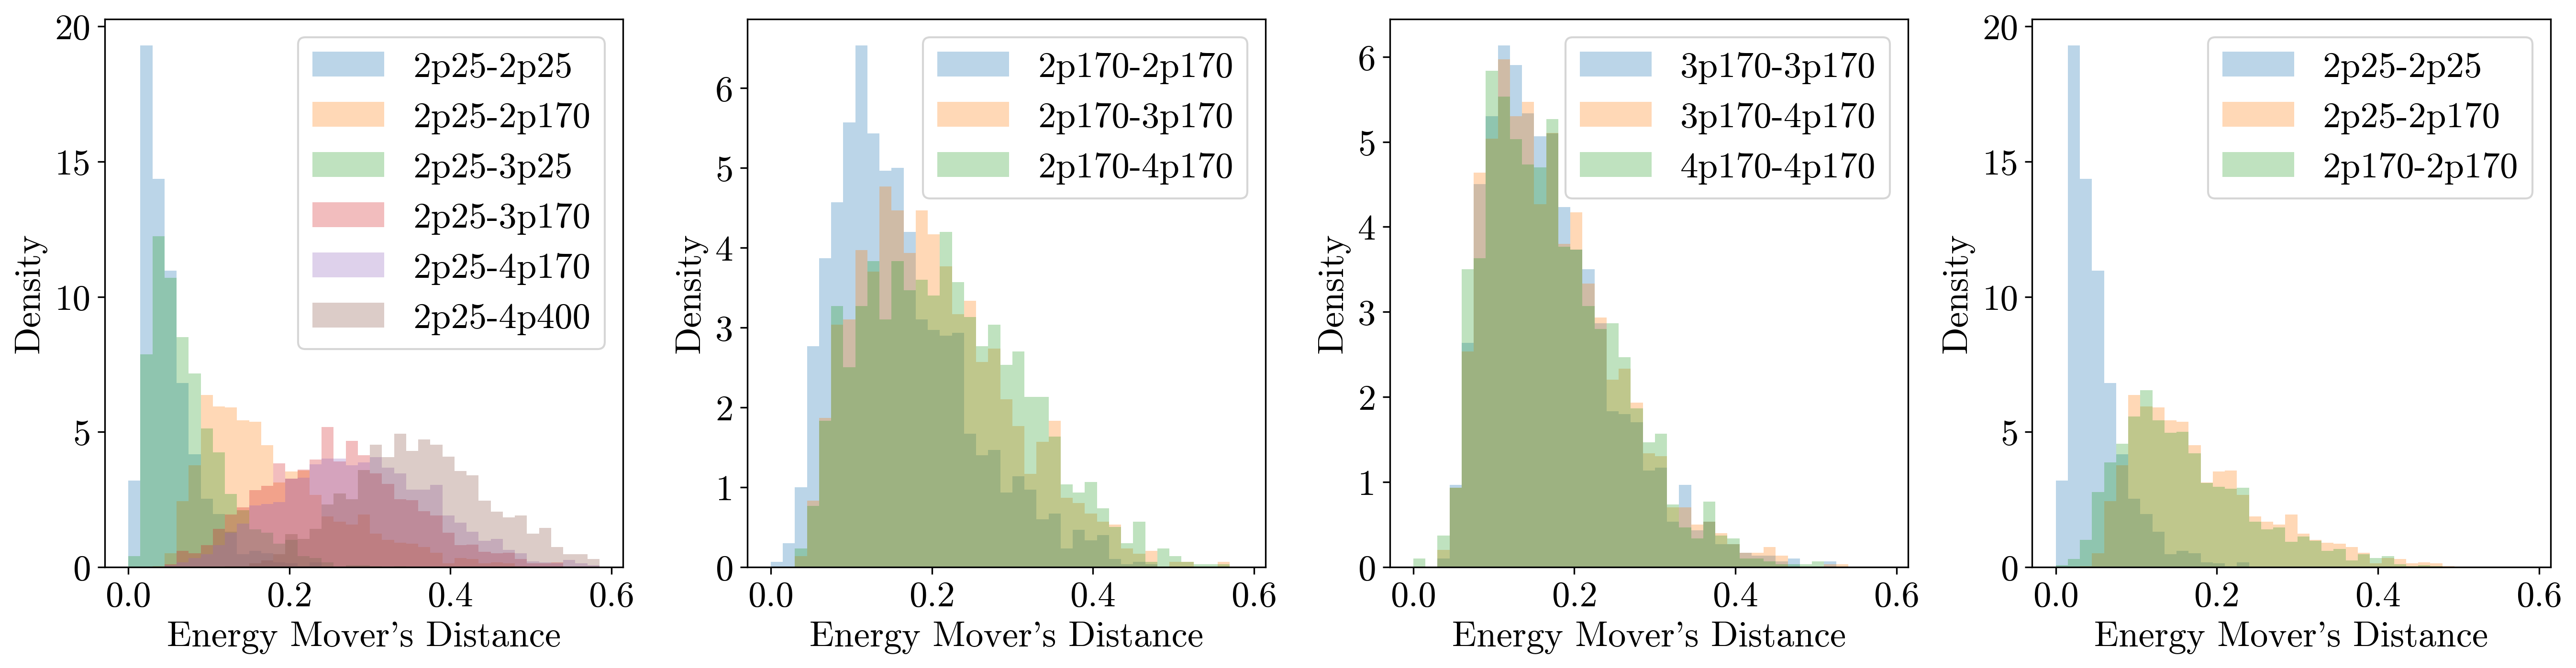

In [62]:


fig = plt.figure(figsize=(18.3, 5), dpi=300)


ax0 = fig.add_subplot(1,4,1)
for index in [7,8,9,10,11,12]:
    ax0.hist(emd_list[index], bins=np.arange(0,.6,.015),alpha=0.3, density=True,label=pairname_list[index]);
ax0.set_xlabel("Energy Mover's Distance")
ax0.set_ylabel("Density")
ax0.legend()
#figname = 'SimulatedJet_EMDDistribution_2p25'
#plt.subplots_adjust(left=0.15, right=.95, top=.95, bottom=0.12)


ax1 = fig.add_subplot(1,4,2)
for index in [13,15,16]:
    ax1.hist(emd_list[index], bins=np.arange(0,.6,0.015),alpha=0.3, density=True,label=pairname_list[index]);
ax1.set_xlabel("Energy Mover's Distance")
ax1.set_ylabel("Density")
ax1.legend()


ax2 = fig.add_subplot(1,4,3)

for index in [22,23,25]:
    ax2.hist(emd_list[index], bins=np.arange(0,0.6,.015),alpha=0.3, density=True,label=pairname_list[index]);
ax2.set_xlabel("Energy Mover's Distance")
ax2.set_ylabel("Density")
ax2.legend()




ax3 = fig.add_subplot(1,4,4)
for index in [7,8,13]:
    ax3.hist(emd_list[index], bins=np.arange(0,.6,.015),alpha=0.3, density=True,label=pairname_list[index]);


#plt.subplots_adjust(hspace=0.6)
fig.tight_layout()


ax3.set_xlabel("Energy Mover's Distance")
ax3.set_ylabel("Density")
ax3.legend()
#plt.title('EMDdist Simulated Jets 2p25')
fig.savefig(f'../figures/paper_JHEP/SimulatedJet_EMDDistribution_GridPlot.png')
fig.savefig(f'../figures/paper_JHEP/SimulatedJet_EMDDistribution_GridPlot.pdf')

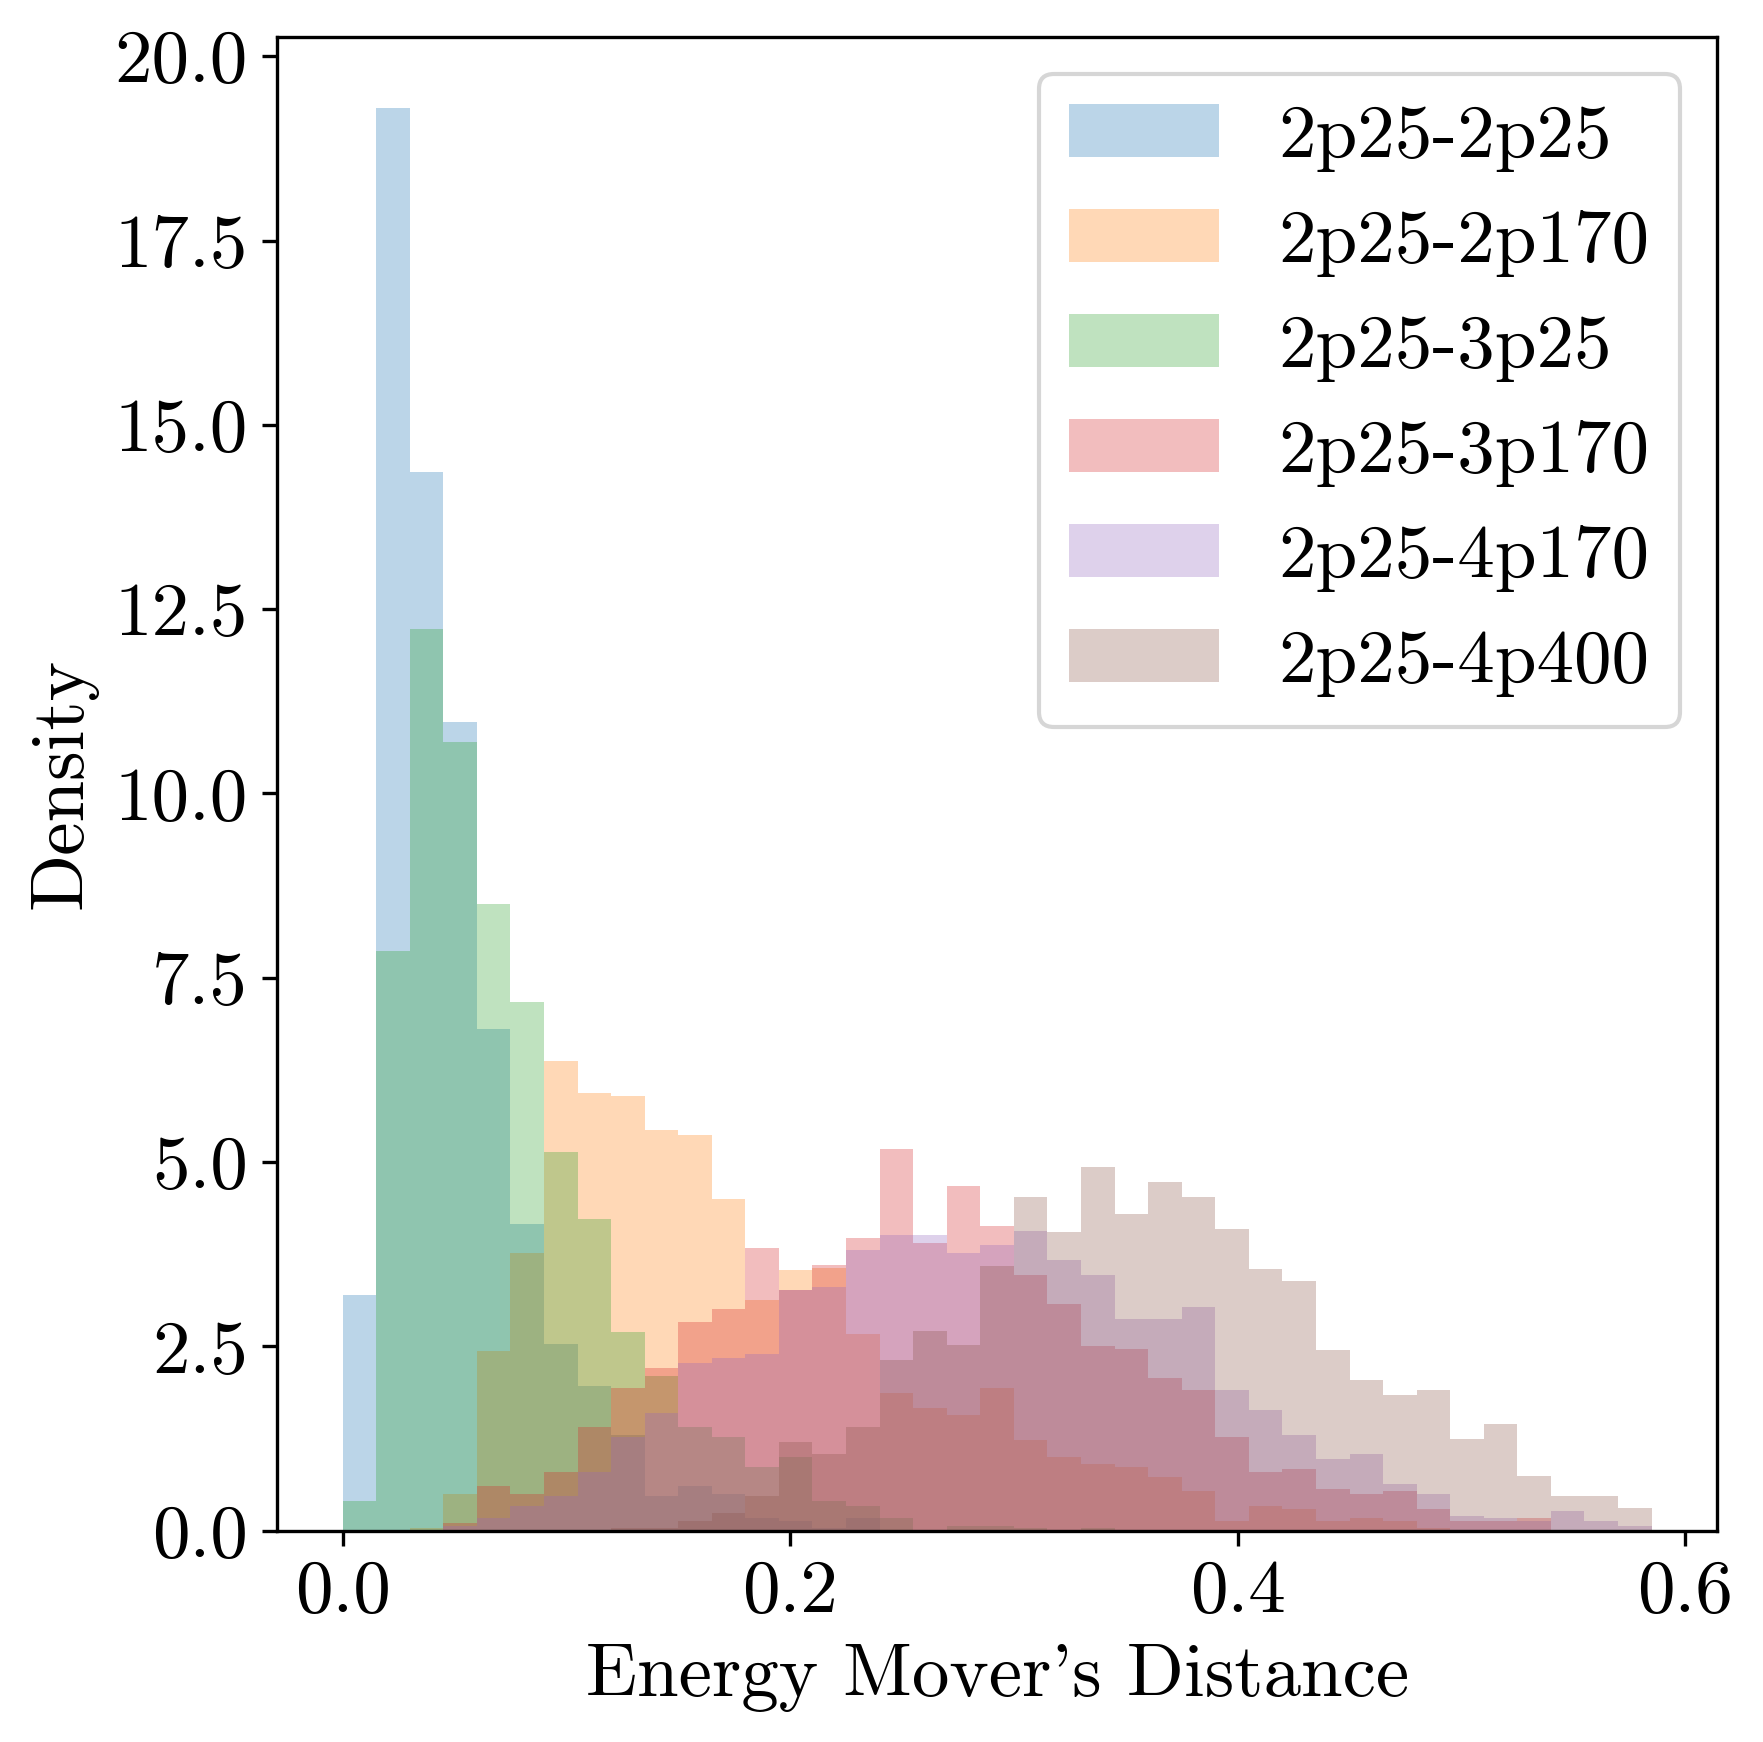

In [35]:


fig = plt.figure(figsize=(6, 6), dpi=300)
ax = fig.add_subplot(1,1,1)
for index in [7,8,9,10,11,12]:
    ax.hist(emd_list[index], bins=np.arange(0,.6,.015),alpha=0.3, density=True,label=pairname_list[index]);





ax.set_xlabel("Energy Mover's Distance")
ax.set_ylabel("Density")
ax.legend()
figname = 'SimulatedJet_EMDDistribution_2p25'
plt.subplots_adjust(left=0.15, right=.95, top=.95, bottom=0.12)

#plt.title('EMDdist Simulated Jets 2p25')
fig.savefig(f'../figures/paper_JHEP/{figname}.png')
fig.savefig(f'../figures/paper_JHEP/{figname}.pdf')

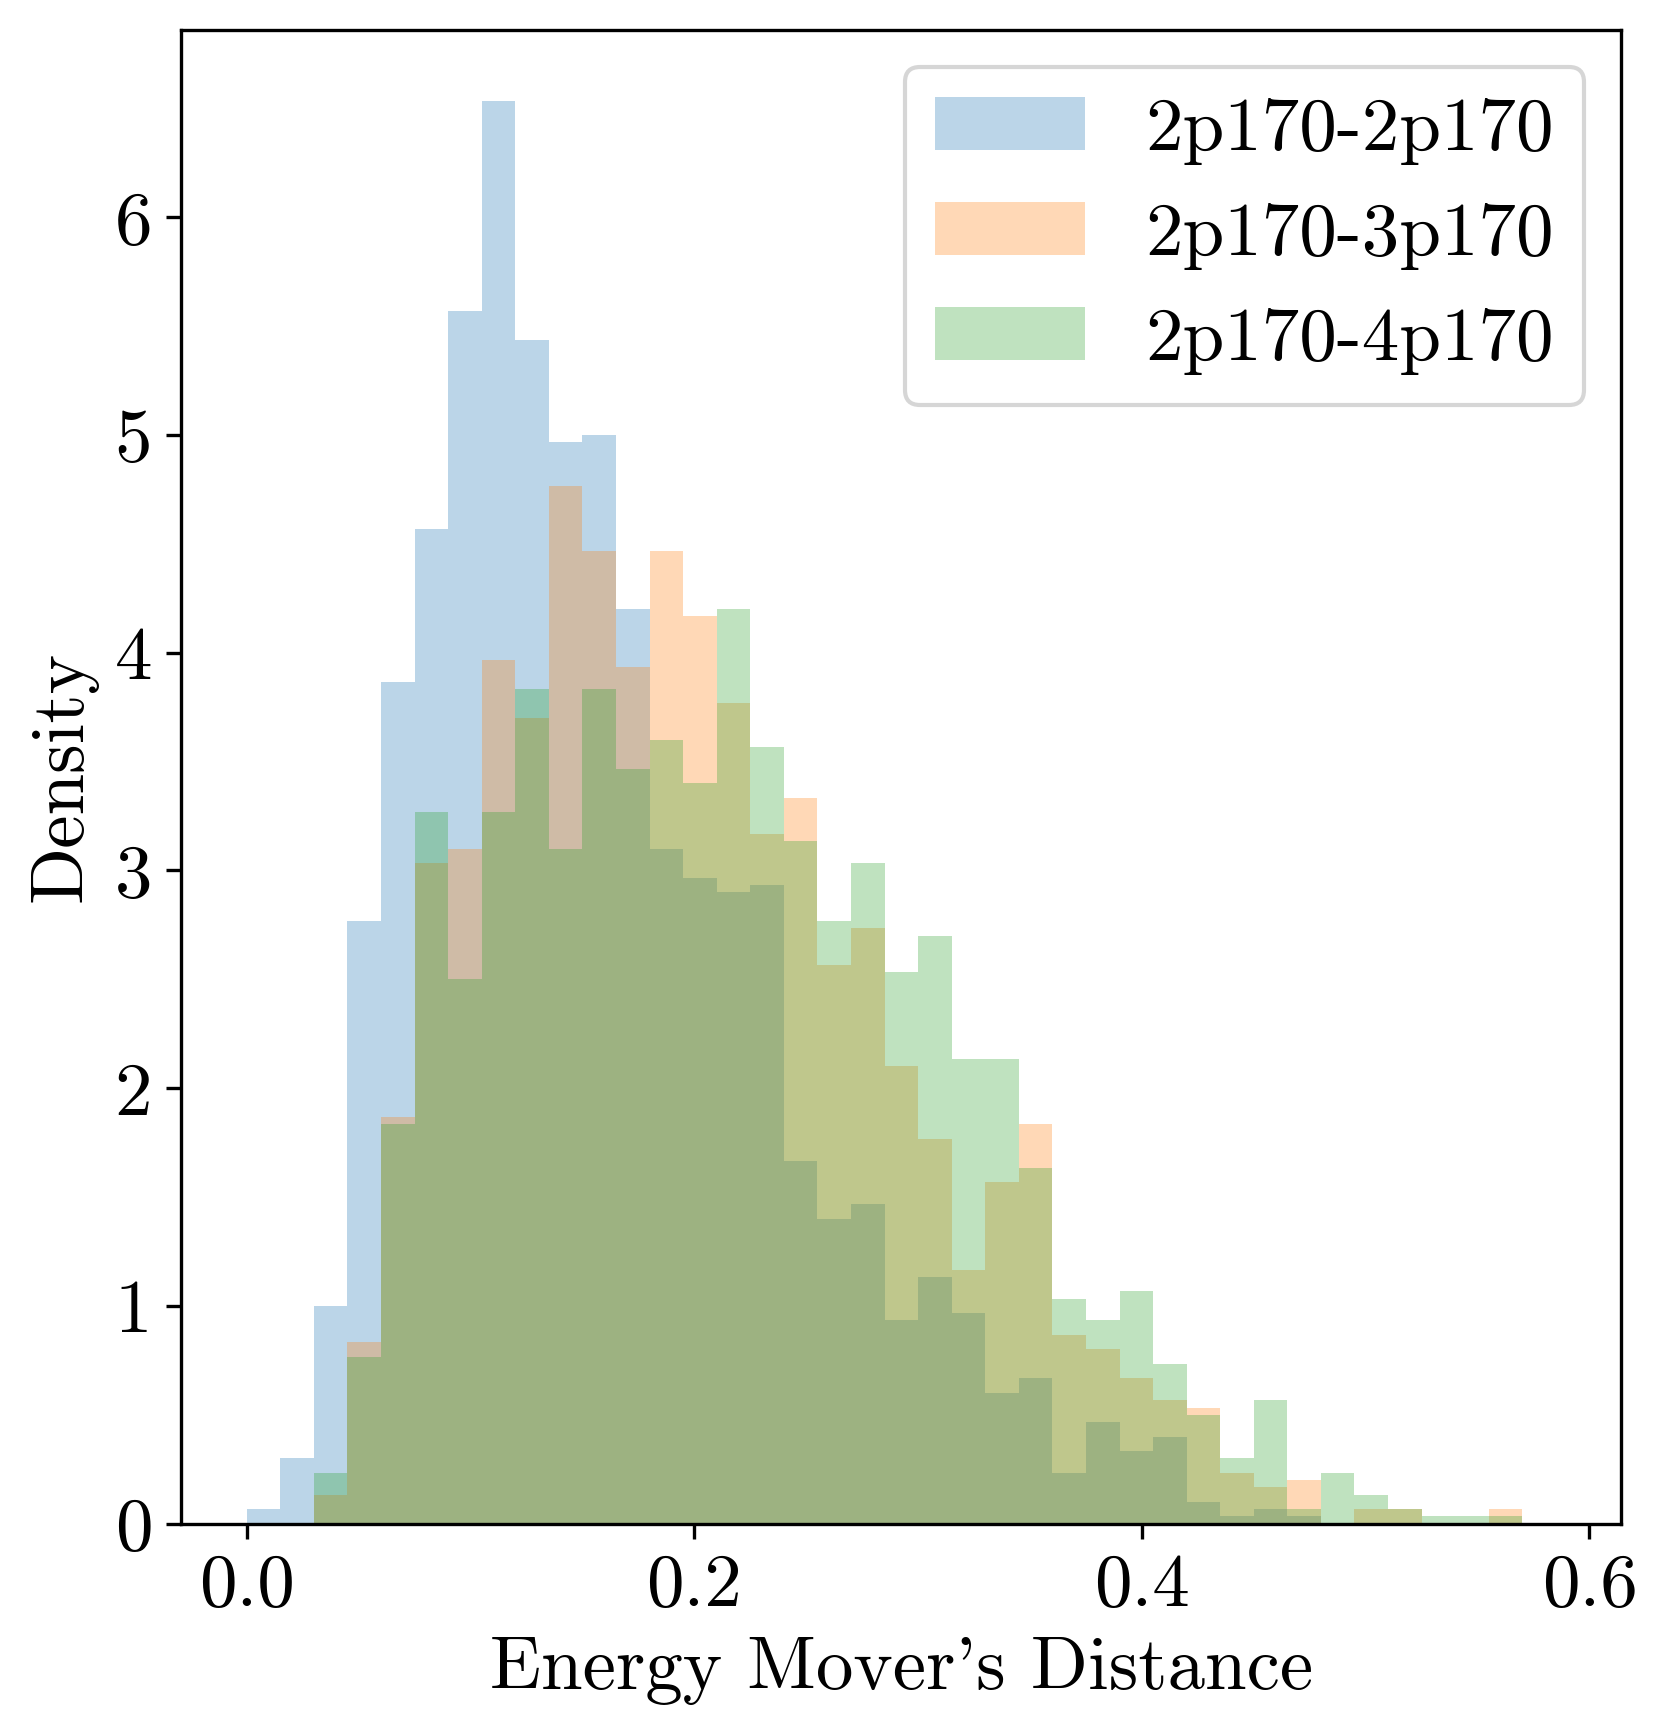

In [36]:

fig = plt.figure(figsize=(6, 6), dpi=300)
ax = fig.add_subplot(1,1,1)

for index in [13,15,16]:
    ax.hist(emd_list[index], bins=np.arange(0,.6,0.015),alpha=0.3, density=True,label=pairname_list[index]);





ax.set_xlabel("Energy Mover's Distance")
ax.set_ylabel("Density")
ax.legend()
figname = 'SimulatedJet_EMDDistribution_2p170'
plt.subplots_adjust(left=0.15, right=.95, top=.95, bottom=0.12)


#plt.title('EMDdist Simulated Jets 2p25')
fig.savefig(f'../figures/paper_JHEP/{figname}.png',bbox_inches='tight')
fig.savefig(f'../figures/paper_JHEP/{figname}.pdf',bbox_inches='tight')

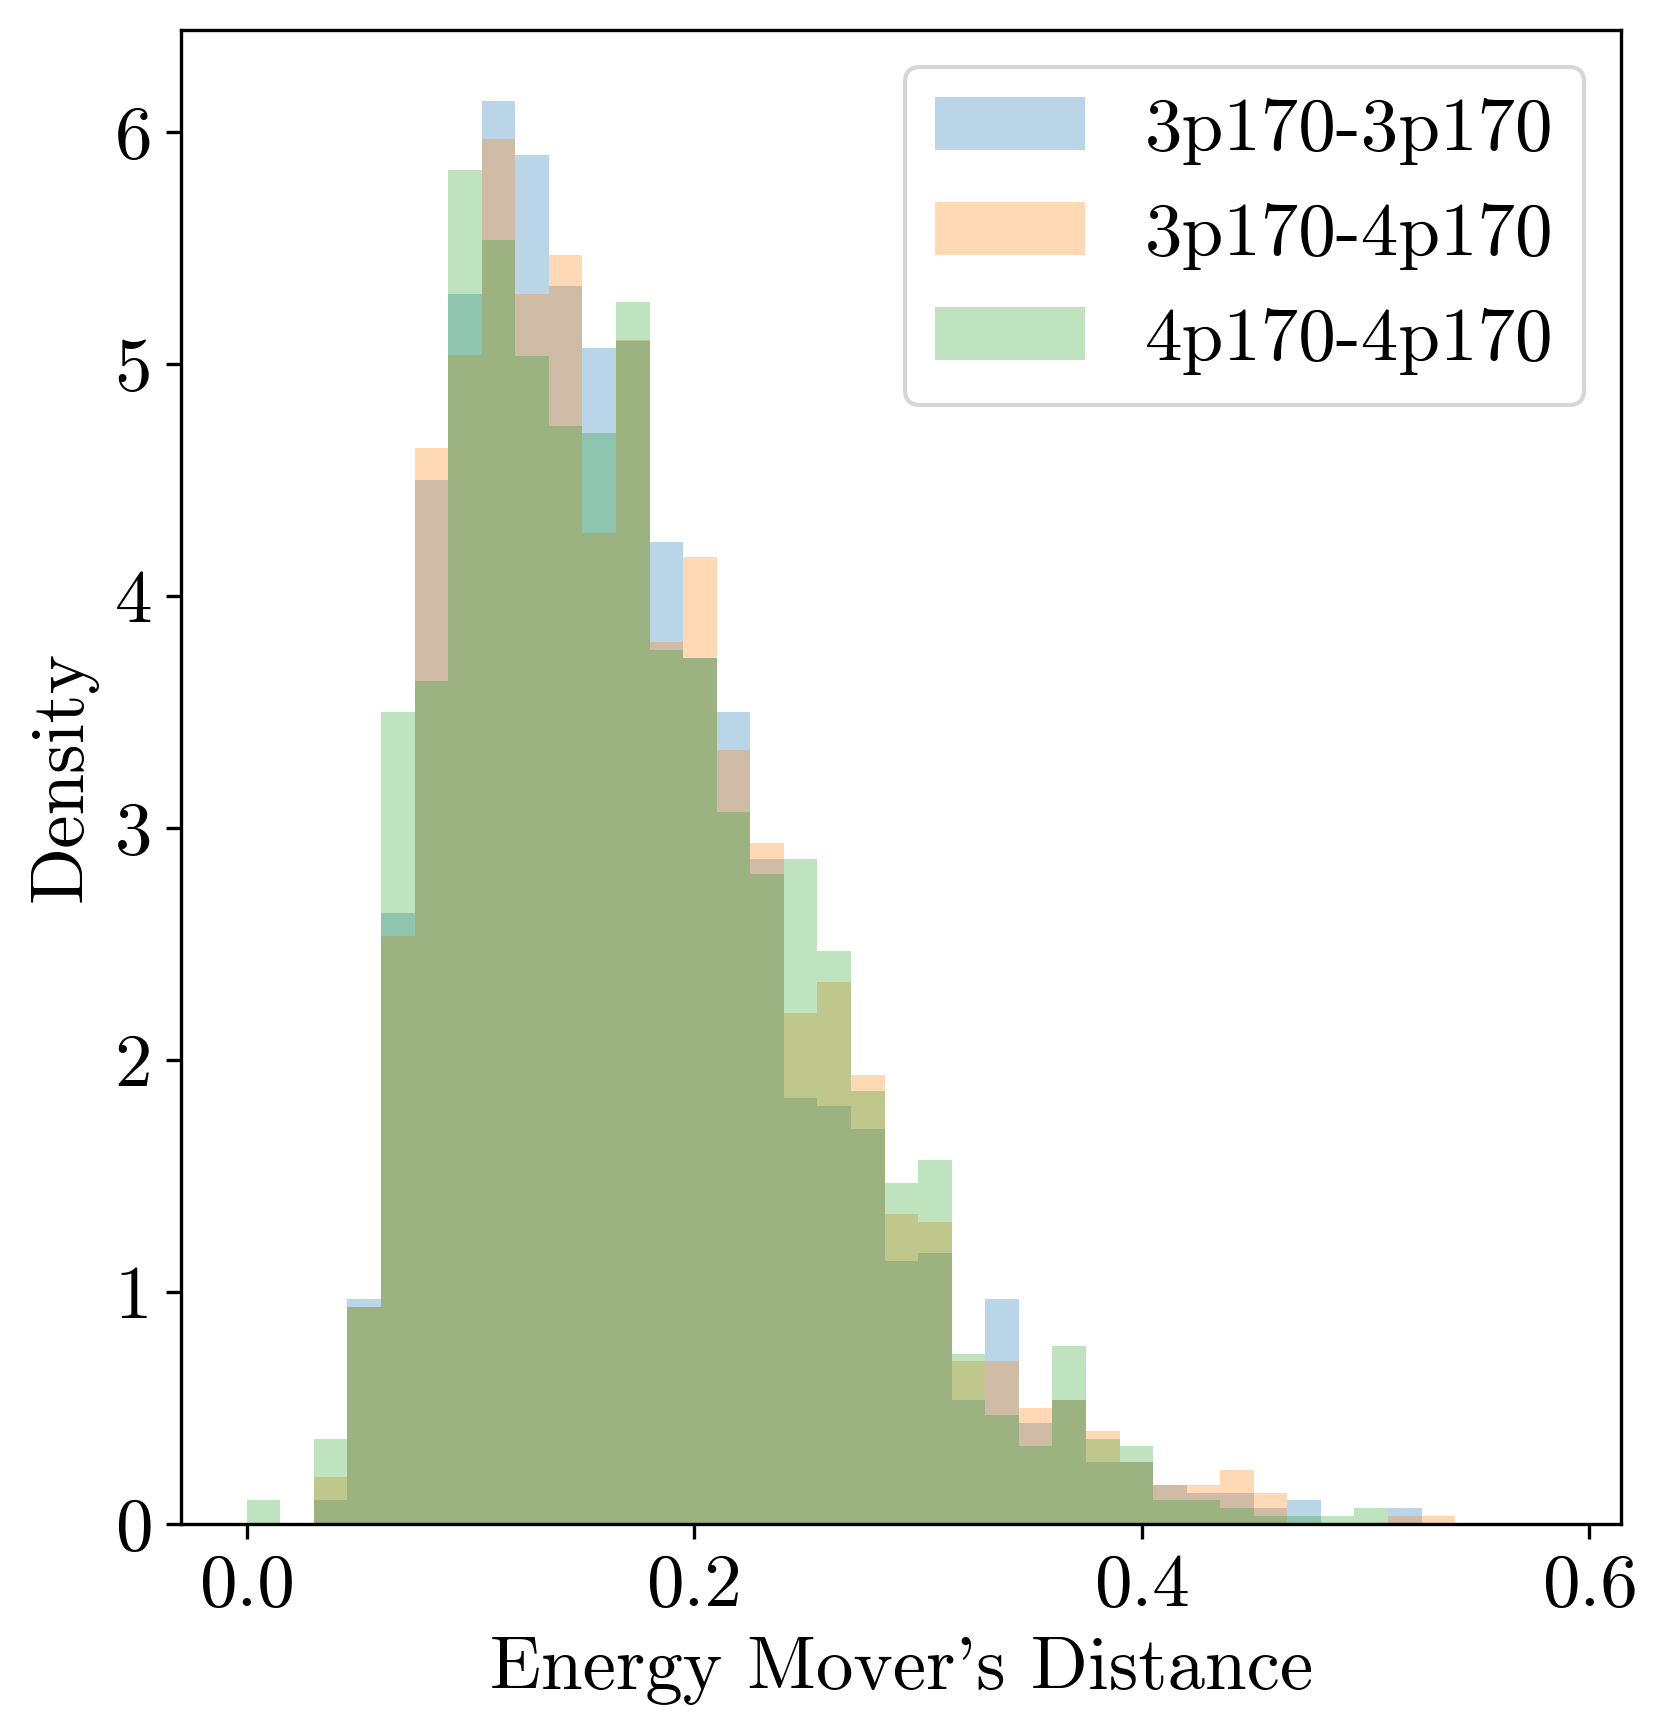

In [37]:

fig = plt.figure(figsize=(6, 6), dpi=300)
ax = fig.add_subplot(1,1,1)

for index in [22,23,25]:
    ax.hist(emd_list[index], bins=np.arange(0,0.6,.015),alpha=0.3, density=True,label=pairname_list[index]);





ax.set_xlabel("Energy Mover's Distance")
ax.set_ylabel("Density")
ax.legend()
figname = 'SimulatedJet_EMDDistribution_3p'
#plt.title('EMDdist Simulated Jets 2p25')
plt.subplots_adjust(left=0.15, right=.95, top=.95, bottom=0.12)

fig.savefig(f'../figures/paper_JHEP/{figname}.png',bbox_inches='tight')
fig.savefig(f'../figures/paper_JHEP/{figname}.pdf',bbox_inches='tight')

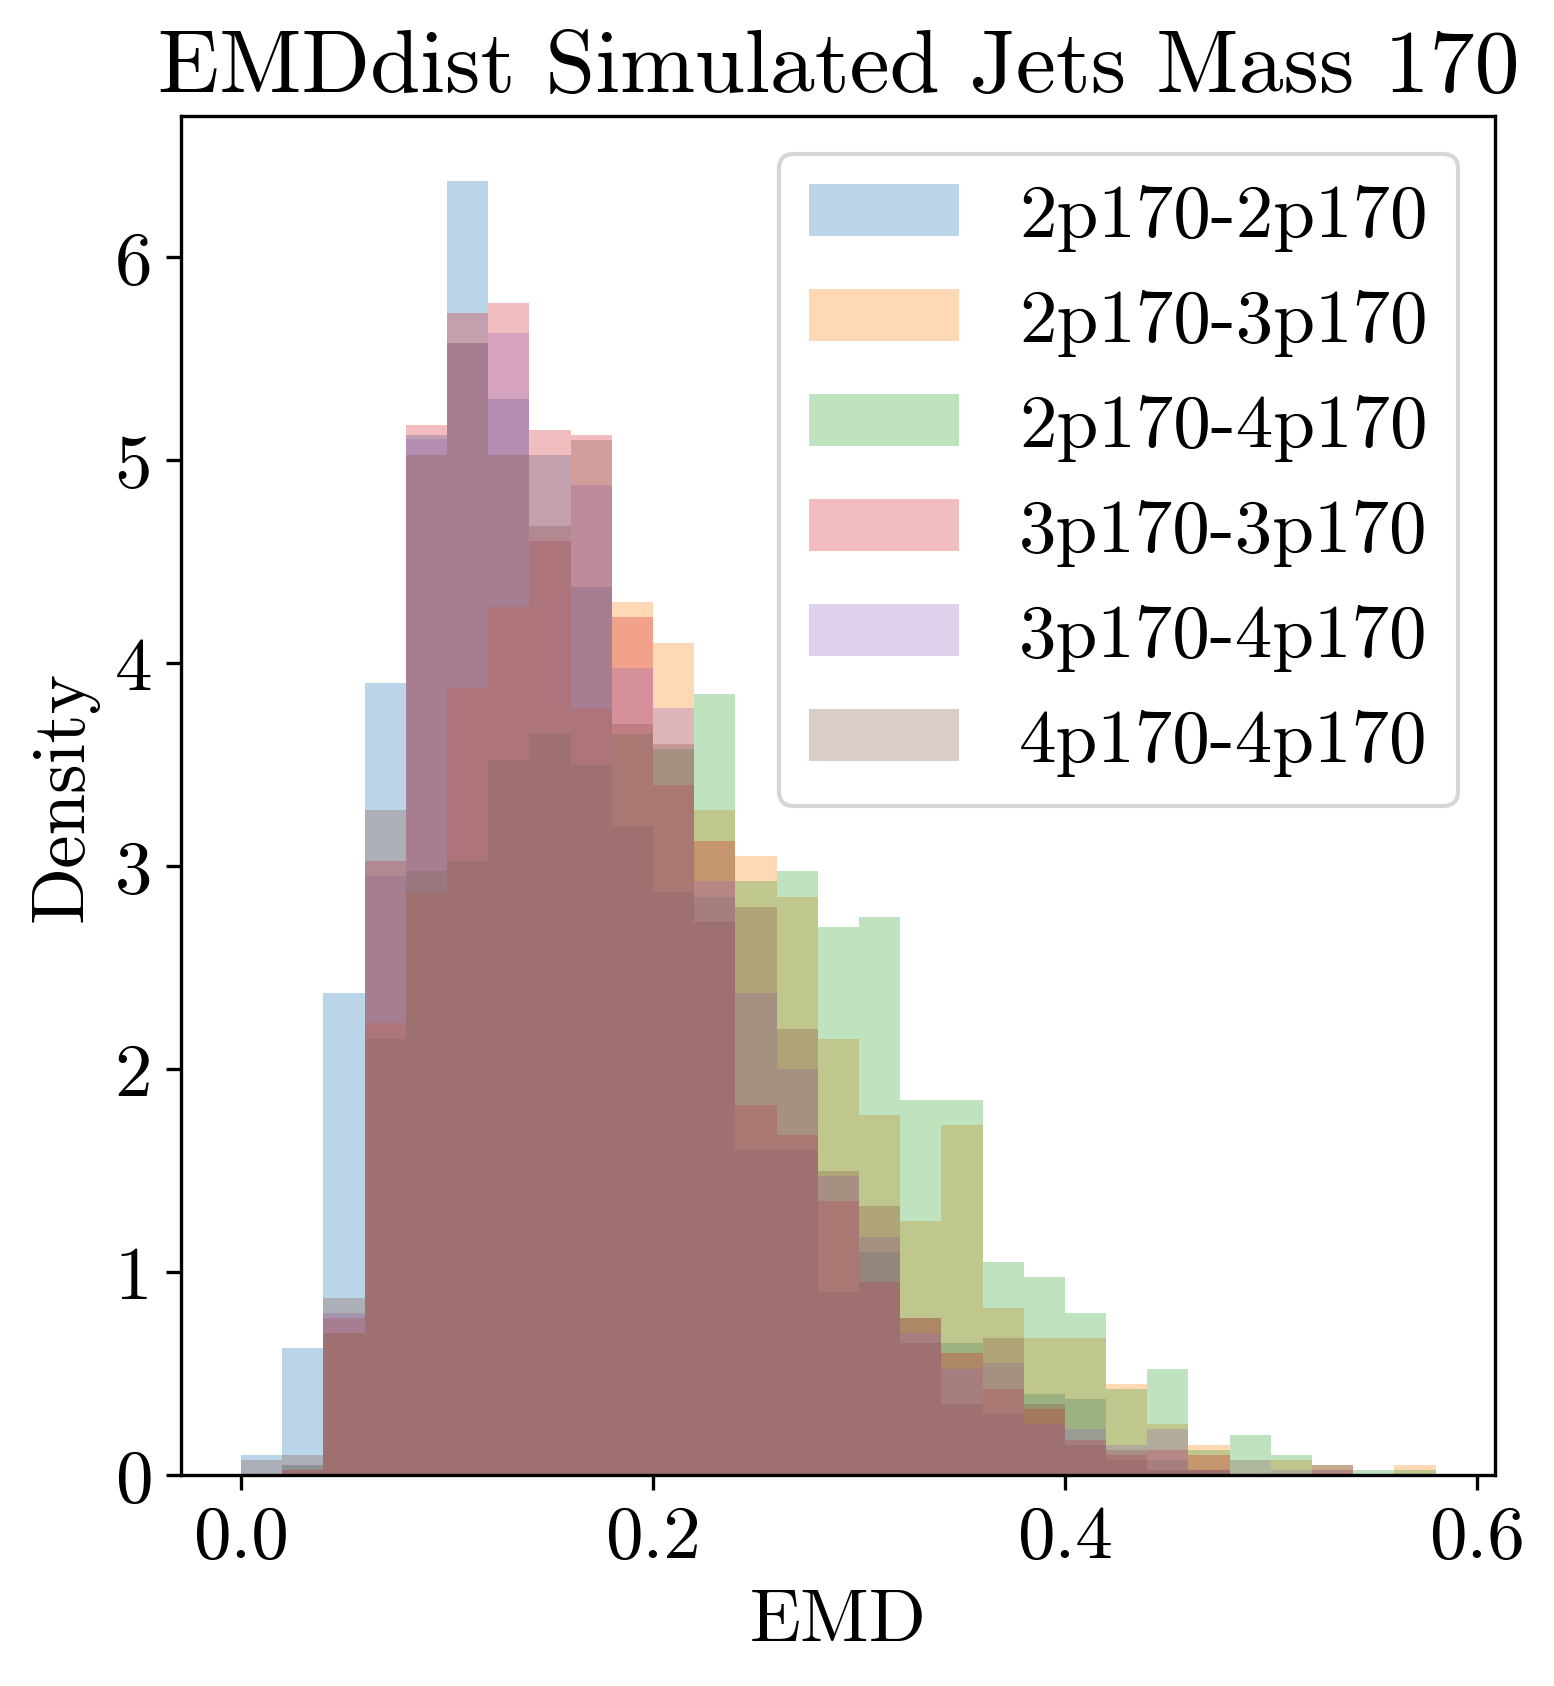

In [22]:
for index in [13,15,16,22,23,25]:
    plt.hist(emd_list[index], bins=np.arange(0,.6,.02),alpha=0.3, density=True,label=pairname_list[index]);





plt.xlabel("EMD")
plt.ylabel("Density")
plt.legend()
figname = 'EMDdist_Gridpack_2p3p4p_170_paper_final'
plt.title('EMDdist Simulated Jets Mass 170')
plt.subplots_adjust(left=0.17)

plt.savefig(f'../figures/paper/{figname}.png',bbox_inches='tight')
plt.savefig(f'../figures/paper/{figname}.pdf',bbox_inches='tight')

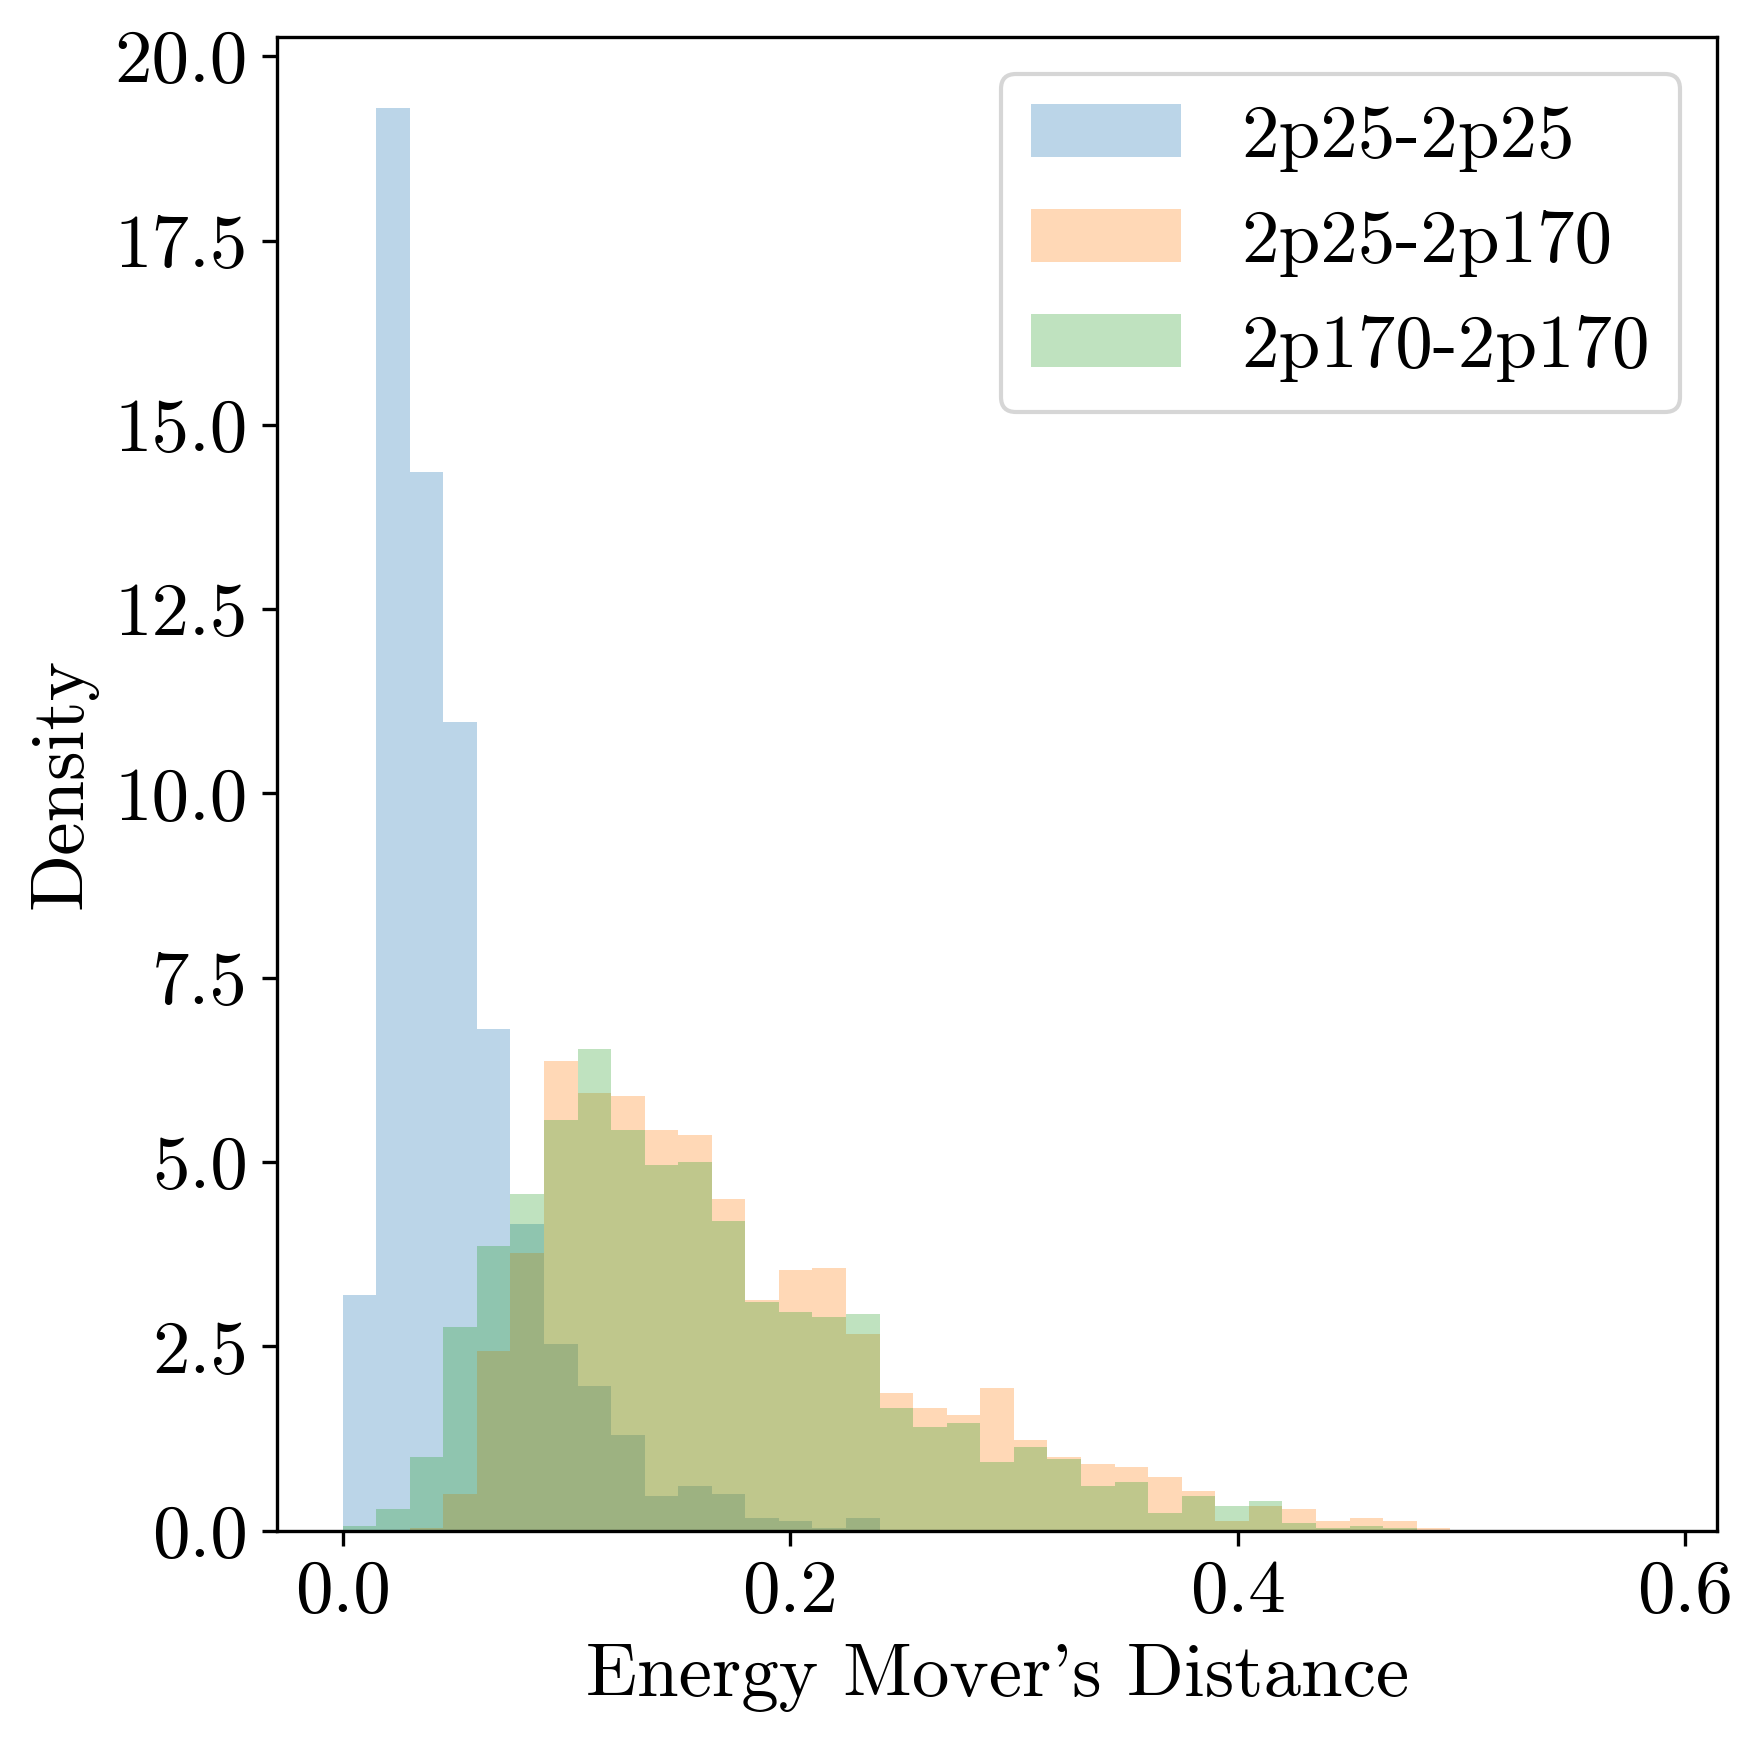

In [38]:

fig = plt.figure(figsize=(6, 6), dpi=300)
ax = fig.add_subplot(1,1,1)
for index in [7,8,13]:
    ax.hist(emd_list[index], bins=np.arange(0,.6,.015),alpha=0.3, density=True,label=pairname_list[index]);




ax.set_xlabel("Energy Mover's Distance")
ax.set_ylabel("Density")
ax.legend()
figname = 'SimulatedJet_EMDDistribution_mass_varied'
#plt.title('EMDdist Simulated Jets 2p25')
plt.subplots_adjust(left=0.15, right=.95, top=.95, bottom=0.12)

fig.savefig(f'../figures/paper_JHEP/{figname}.png',bbox_inches='tight')
fig.savefig(f'../figures/paper_JHEP/{figname}.pdf',bbox_inches='tight')

In [12]:
pairname_list

NameError: name 'pairname_list' is not defined

In [21]:
test

array([ 0.75639665,  4.33136463, 10.66852188, ...,  7.29239082,
        7.10450172, 19.61729813])

In [42]:
#a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],float)
#a[np.r_[0,3:6]]

In [43]:
#set_12 = JetDataset(False, None, False, dt1[:1000],dt1[1000:2000], 32)

In [44]:
NPART = 16

In [45]:
set_12 = JetDataset(False, None, False, dt1[:1000,np.r_[0:3*NPART,96:100]],dt2[1000:2000,np.r_[0:3*NPART,96:100]], NPART)

100%|██████████| 10/10 [00:11<00:00,  1.15s/it]


In [46]:
set_13 = JetDataset(False, None, False, dt1[1000:2000,np.r_[0:3*NPART,96:100]],dt3[1000:2000,np.r_[0:3*NPART,96:100]], NPART)

100%|██████████| 10/10 [00:09<00:00,  1.01it/s]


In [47]:
set_23 = JetDataset(False, None, False, dt2[:1000,np.r_[0:3*NPART,96:100]],dt3[1000:2000,np.r_[0:3*NPART,96:100]], NPART)

100%|██████████| 10/10 [00:09<00:00,  1.01it/s]


In [48]:
set_22 = JetDataset(False, None, False, dt2[:1000,np.r_[0:3*NPART,96:100]],dt2[1000:2000,np.r_[0:3*NPART,96:100]], NPART)

100%|██████████| 10/10 [00:09<00:00,  1.02it/s]


In [49]:
set_11 = JetDataset(False, None, False, dt1[:1000,np.r_[0:3*NPART,96:100]],dt1[1000:2000,np.r_[0:3*NPART,96:100]], NPART)
set_33 = JetDataset(False, None, False, dt3[:1000,np.r_[0:3*NPART,96:100]],dt3[1000:2000,np.r_[0:3*NPART,96:100]], NPART)

100%|██████████| 10/10 [00:09<00:00,  1.01it/s]


In [50]:
loader12 = DataLoader(set_12, batch_size=500,shuffle=False,num_workers=4)

loader13 = DataLoader(set_13, batch_size=500,shuffle=False,num_workers=4)

loader23 = DataLoader(set_23, batch_size=500,shuffle=False,num_workers=4)

loader22 = DataLoader(set_22, batch_size=500,shuffle=False,num_workers=4)
loader11 = DataLoader(set_11, batch_size=500,shuffle=False,num_workers=4)
loader33 = DataLoader(set_33, batch_size=500,shuffle=False,num_workers=4)

In [51]:
emd12 = np.array([])
set_1 = np.empty([0, 16, 3])
set_2 = np.empty([0, 16, 3])
set_3 = np.empty([0, 16, 3])
for x,y,dist in loader12:
    set_1 = np.concatenate([set_1, x.data.numpy()])
    set_2 = np.concatenate([set_2, y.data.numpy()])
    emd12 = np.concatenate([emd12,dist.data.numpy()])
    
emd13 = np.array([])
for x,y,dist in loader13:
    set_3 = np.concatenate([set_3, y.data.numpy()])
    emd13 = np.concatenate([emd13,dist.data.numpy()])

emd23 = np.array([])
for x,y,dist in loader23:
    emd23 = np.concatenate([emd23,dist.data.numpy()])
    
emd22 = np.array([])
for x,y,dist in loader22:
    emd22 = np.concatenate([emd22,dist.data.numpy()])
    
    
emd11 = np.array([])
for x,y,dist in loader11:
    emd11 = np.concatenate([emd11,dist.data.numpy()])
    
    
emd33 = np.array([])
for x,y,dist in loader33:
    emd33 = np.concatenate([emd33,dist.data.numpy()])

In [52]:
set_1 = set_1[:,:,[2, 0, 1]]
set_2 = set_2[:,:,[2, 0, 1]]
set_3 = set_3[:,:,[2, 0, 1]]

In [53]:
set_1[3]

array([[ 0.1861693 ,  0.09638215,  0.18481283],
       [ 0.09058867,  0.08916221,  0.1872151 ],
       [ 0.09037904, -0.1561791 , -0.12477697],
       [ 0.07137628,  0.09280071,  0.1768734 ],
       [ 0.07056378, -0.01663313,  0.18884149],
       [ 0.0661383 ,  0.07445101,  0.22609909],
       [ 0.0612847 , -0.16129816, -0.11549707],
       [ 0.05984762,  0.10377647,  0.19543324],
       [ 0.0503278 ,  0.03470885, -0.58630162],
       [ 0.05021537,  0.06523994, -0.65545046],
       [ 0.03698058, -0.14763363, -0.11493617],
       [ 0.03151609,  0.08715111,  0.19114462],
       [ 0.02577348,  0.58550882, -0.56920397],
       [ 0.02177188,  0.07557248, -0.61885393],
       [ 0.02117559,  0.0633132 ,  0.17918482],
       [ 0.01565016, -0.14807481, -0.13756812]])

(array([104., 308., 277., 176.,  70.,  24.,  21.,  11.,   3.,   6.]),
 array([0.03727007, 0.08994412, 0.14261818, 0.19529223, 0.24796629,
        0.30064034, 0.3533144 , 0.40598845, 0.45866251, 0.51133656,
        0.56401062]),
 <BarContainer object of 10 artists>)

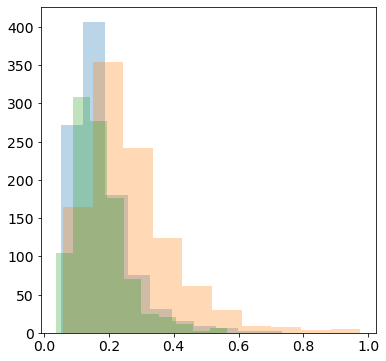

In [54]:
plt.hist(set_1[:,0,0], alpha=0.3)
plt.hist(set_2[:,0,0], alpha=0.3)
plt.hist(set_3[:,0,0], alpha=0.3)

In [65]:
plt.rcParams["figure.figsize"] = (6,6)


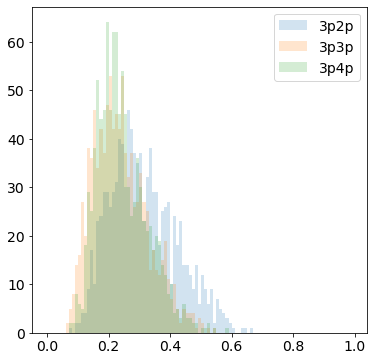

In [66]:
plt.hist(emd23, bins=np.arange(0,1,0.01),alpha=0.2, label='3p2p');
plt.hist(emd33, bins=np.arange(0,1,0.01),alpha=0.2, label='3p3p');
plt.hist(emd13, bins=np.arange(0,1,0.01),alpha=0.2, label='3p4p');
plt.legend()
plt.savefig('../figures/EMD_3p_Wprime.png')

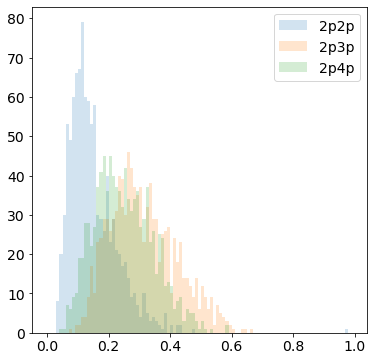

In [67]:
plt.hist(emd22, bins=np.arange(0,1,0.01),alpha=0.2, label='2p2p');
plt.hist(emd23, bins=np.arange(0,1,0.01),alpha=0.2, label='2p3p');
plt.hist(emd12, bins=np.arange(0,1,0.01),alpha=0.2, label='2p4p');
plt.legend()
plt.savefig('../figures/EMD_2p_Wp.png')

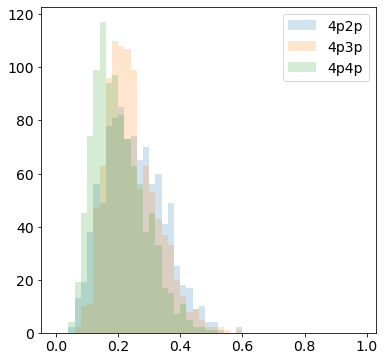

In [70]:
plt.hist(emd12, bins=np.arange(0,1,0.02),alpha=0.2, label='4p2p');
plt.hist(emd13, bins=np.arange(0,1,0.02),alpha=0.2, label='4p3p');

plt.hist(emd11, bins=np.arange(0,1,0.02),alpha=0.2, label='4p4p');

plt.legend()
plt.savefig('../figures/EMD_4p_Triboson.png')

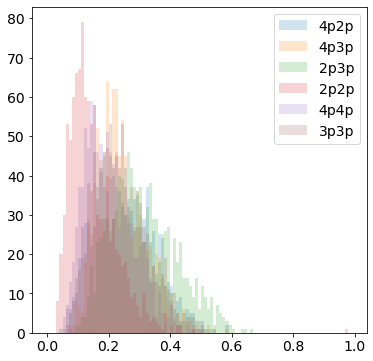

In [58]:
plt.hist(emd12, bins=np.arange(0,1,0.01),alpha=0.2, label='4p2p');
plt.hist(emd13, bins=np.arange(0,1,0.01),alpha=0.2, label='4p3p');
plt.hist(emd23, bins=np.arange(0,1,0.01),alpha=0.2, label='2p3p');
plt.hist(emd22, bins=np.arange(0,1,0.01),alpha=0.2, label='2p2p');
plt.hist(emd11, bins=np.arange(0,1,0.01),alpha=0.2, label='4p4p');
plt.hist(emd33, bins=np.arange(0,1,0.01),alpha=0.2, label='3p3p');


plt.legend()
#plt.savefig('../figures/EMD_Top_normalized')

In [ ]:
def get_emd_dist(dataset_len, set1, set2, npart):
    set_ab = JetDataset(False, None, False, set1,set2[np.random.permutation(dataset_len)],npart)
    loader = DataLoader(set_ab, batch_size=2000,shuffle=False,num_workers=4)
    emd = np.array([])
    for x,y,dist in loader:
        emd = np.concatenate([emd,dist.data.numpy()])
    return emd

In [15]:
pairname_list

NameError: name 'pairname_list' is not defined

In [ ]:
idx_list = []

name_list = ['QCD','2p25','2p170','3p25','3p170','4p170','4p400']

pairname_list = []

emd_list = []
for i in range(7):
    for j in range(7):
        if i<=j:
            idx_list.append([i,j])
            pairname_list.append(f'{name_list[i]}-{name_list[j]}')
            emd_list.append(get_emd_dist(2000, set_list[i][:2000], set_list[j][:2000], 16))
        

In [10]:
rawjetdir = '/nobackup/users/sangeon/datasets/jetGridpack/rawjets/'
type_arr  = [['QCD/with_taus','QCD',''],['2p/with_taus','twoprong','_25'],['2p/with_taus','twoprong','_170'],['3p/with_taus','threeprong','_25'],['3p/with_taus','threeprong','_170'],['4p/with_taus','fourprong','_170'],['4p/with_taus','fourprong','_400']]
set_list = []
for jettype in type_arr:
    df = pd.read_hdf(os.path.join(rawjetdir,jettype[0],f'{jettype[1]}{jettype[2]}.h5'))
    set_list.append(df.values)

In [11]:
len(set_list)

7

In [12]:
idx_pair = [(0,2), (4,5)]
set_qcd = np.empty([0, 16, 3])
set_2p = np.empty([0, 16, 3])
set_3p = np.empty([0, 16, 3])
set_4p = np.empty([0, 16, 3])

set_12 = JetDataset(False, None, False, set_list[0][:100],set_list[2][:100],16)
set_34 = JetDataset(False, None, False, set_list[4][:100],set_list[5][:100],16)

loader12 = DataLoader(set_12, batch_size=2000,shuffle=False,num_workers=4)
loader34 = DataLoader(set_34, batch_size=2000,shuffle=False,num_workers=4)


for x,y,dist in loader12:
    set_qcd = np.concatenate([set_qcd, x.data.numpy()])
    set_2p = np.concatenate([set_2p, y.data.numpy()])
    
for x,y,dist in loader34:
    set_3p = np.concatenate([set_3p, x.data.numpy()])
    set_4p = np.concatenate([set_4p, y.data.numpy()])

100%|██████████| 1/1 [00:00<00:00,  1.01it/s]


In [13]:
set_qcd = set_qcd[:,:,[2, 0, 1]]
set_2p = set_2p[:,:,[2, 0, 1]]
set_3p = set_3p[:,:,[2, 0, 1]]
set_4p = set_4p[:,:,[2, 0, 1]]

In [14]:
def plot_multiple_jets(ax, pfcands, index, color):

    pt = pfcands[:,0]
    eta = pfcands[:,1]
    phi = pfcands[:,2]
    #fig = plt.figure()
    #ax = fig.add_subplot(1,1,1)
    ax[index].scatter(eta,phi,s=pt*1000, alpha=0.2, color=color)
    #ax.set_xlabel('deta')
    #ax.set_ylabel('dphi')
    ax[index].set_xlim([-1.5,1.5])
    ax[index].set_ylim([-1.5,1.5])

In [15]:
def plot_jet(pfcands):

    pt = pfcands[:,0]
    eta = pfcands[:,1]
    phi = pfcands[:,2]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(eta,phi,s=pt*1000, alpha=0.2)
    ax.set_xlabel('deta')
    ax.set_ylabel('dphi')
    ax.set_xlim([-1.5,1.5])
    ax.set_ylim([-1.5,1.5])
    #fig.savefig(f'{path}/{name}.png')

In [16]:
import matplotlib as mpl
import matplotlib.font_manager as font_manager

mpl.rcParams['font.family']='serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False
import matplotlib.pyplot as plt


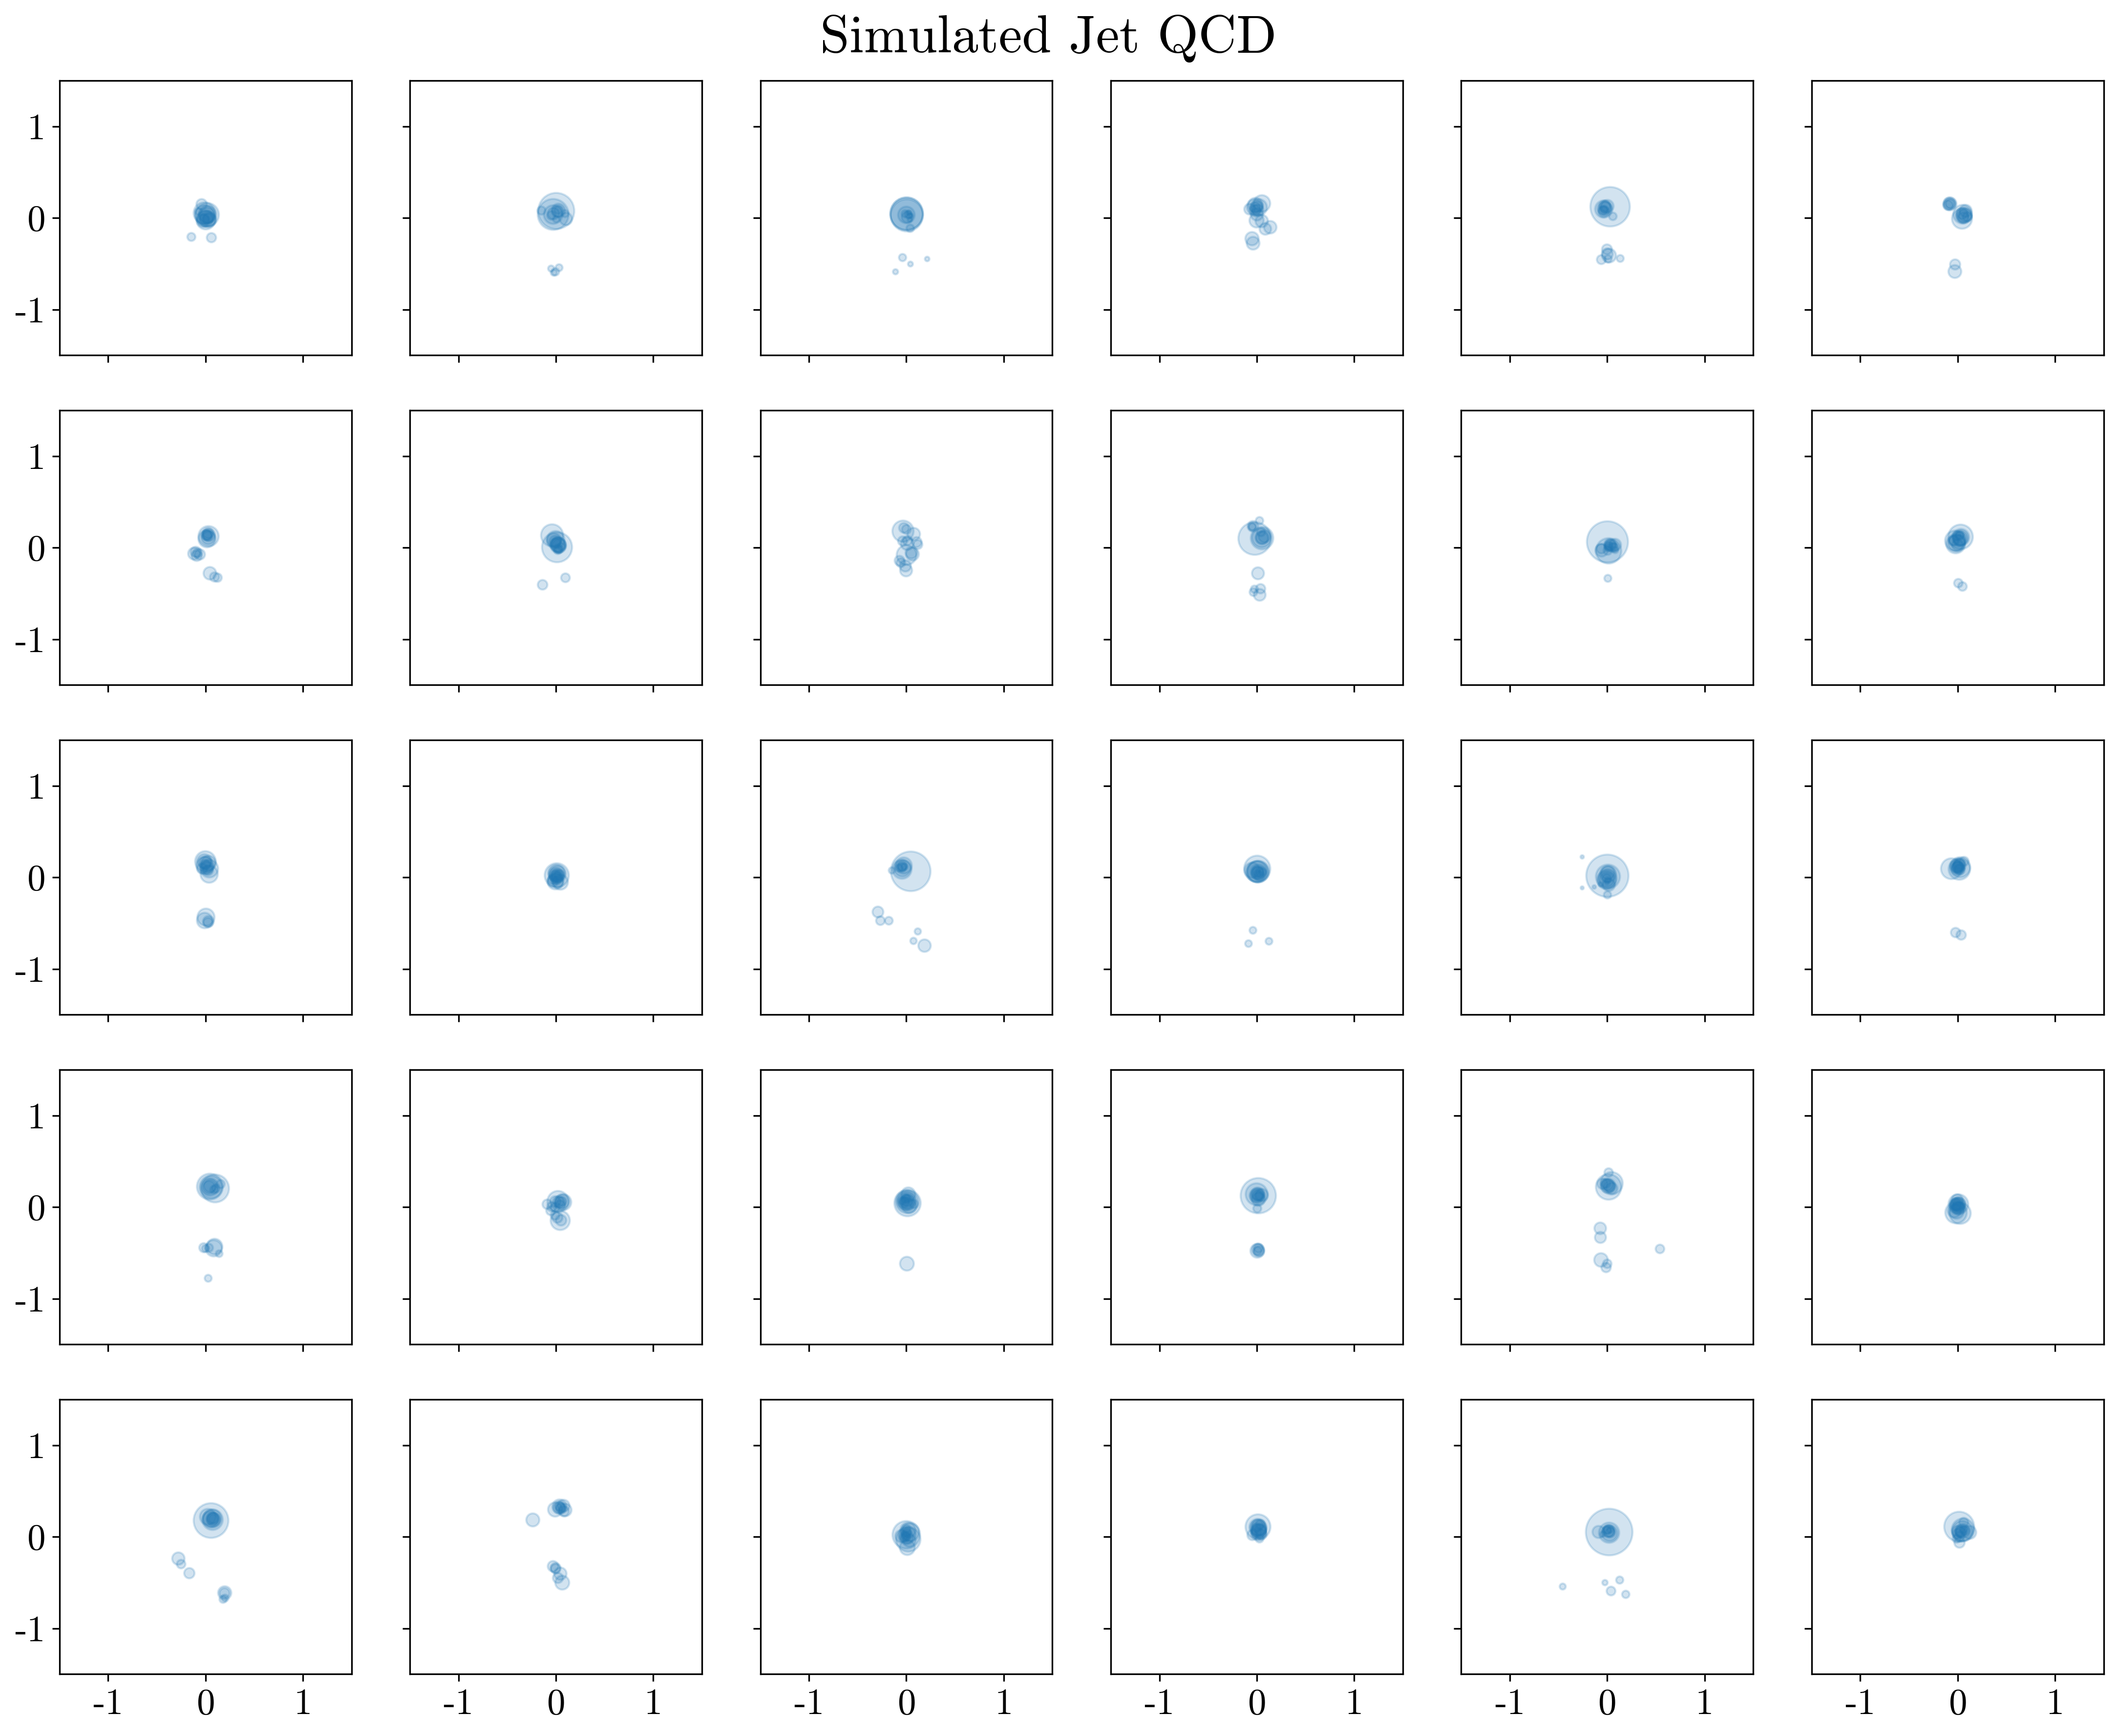

In [17]:
plt.rcParams["figure.figsize"] = (18,15)
plt.rcParams.update({'font.size': 18})
fig, axs = plt.subplots(5, 6, sharex=True, sharey=True)
axs = axs.ravel()
for i in range(30):
    plot_multiple_jets(axs, set_qcd[i], i, 'C0')
    
fig = plt.gcf()
st = fig.suptitle("Simulated Jet QCD", fontsize="x-large")
st.set_y(0.88)
fig.subplots_adjust(top=0.85)


fig.savefig('../figures/paper_JHEP/Examples_SimulatedJet_QCD.png')
fig.savefig('../figures/paper_JHEP/Examples_SimulatedJet_QCD.pdf')

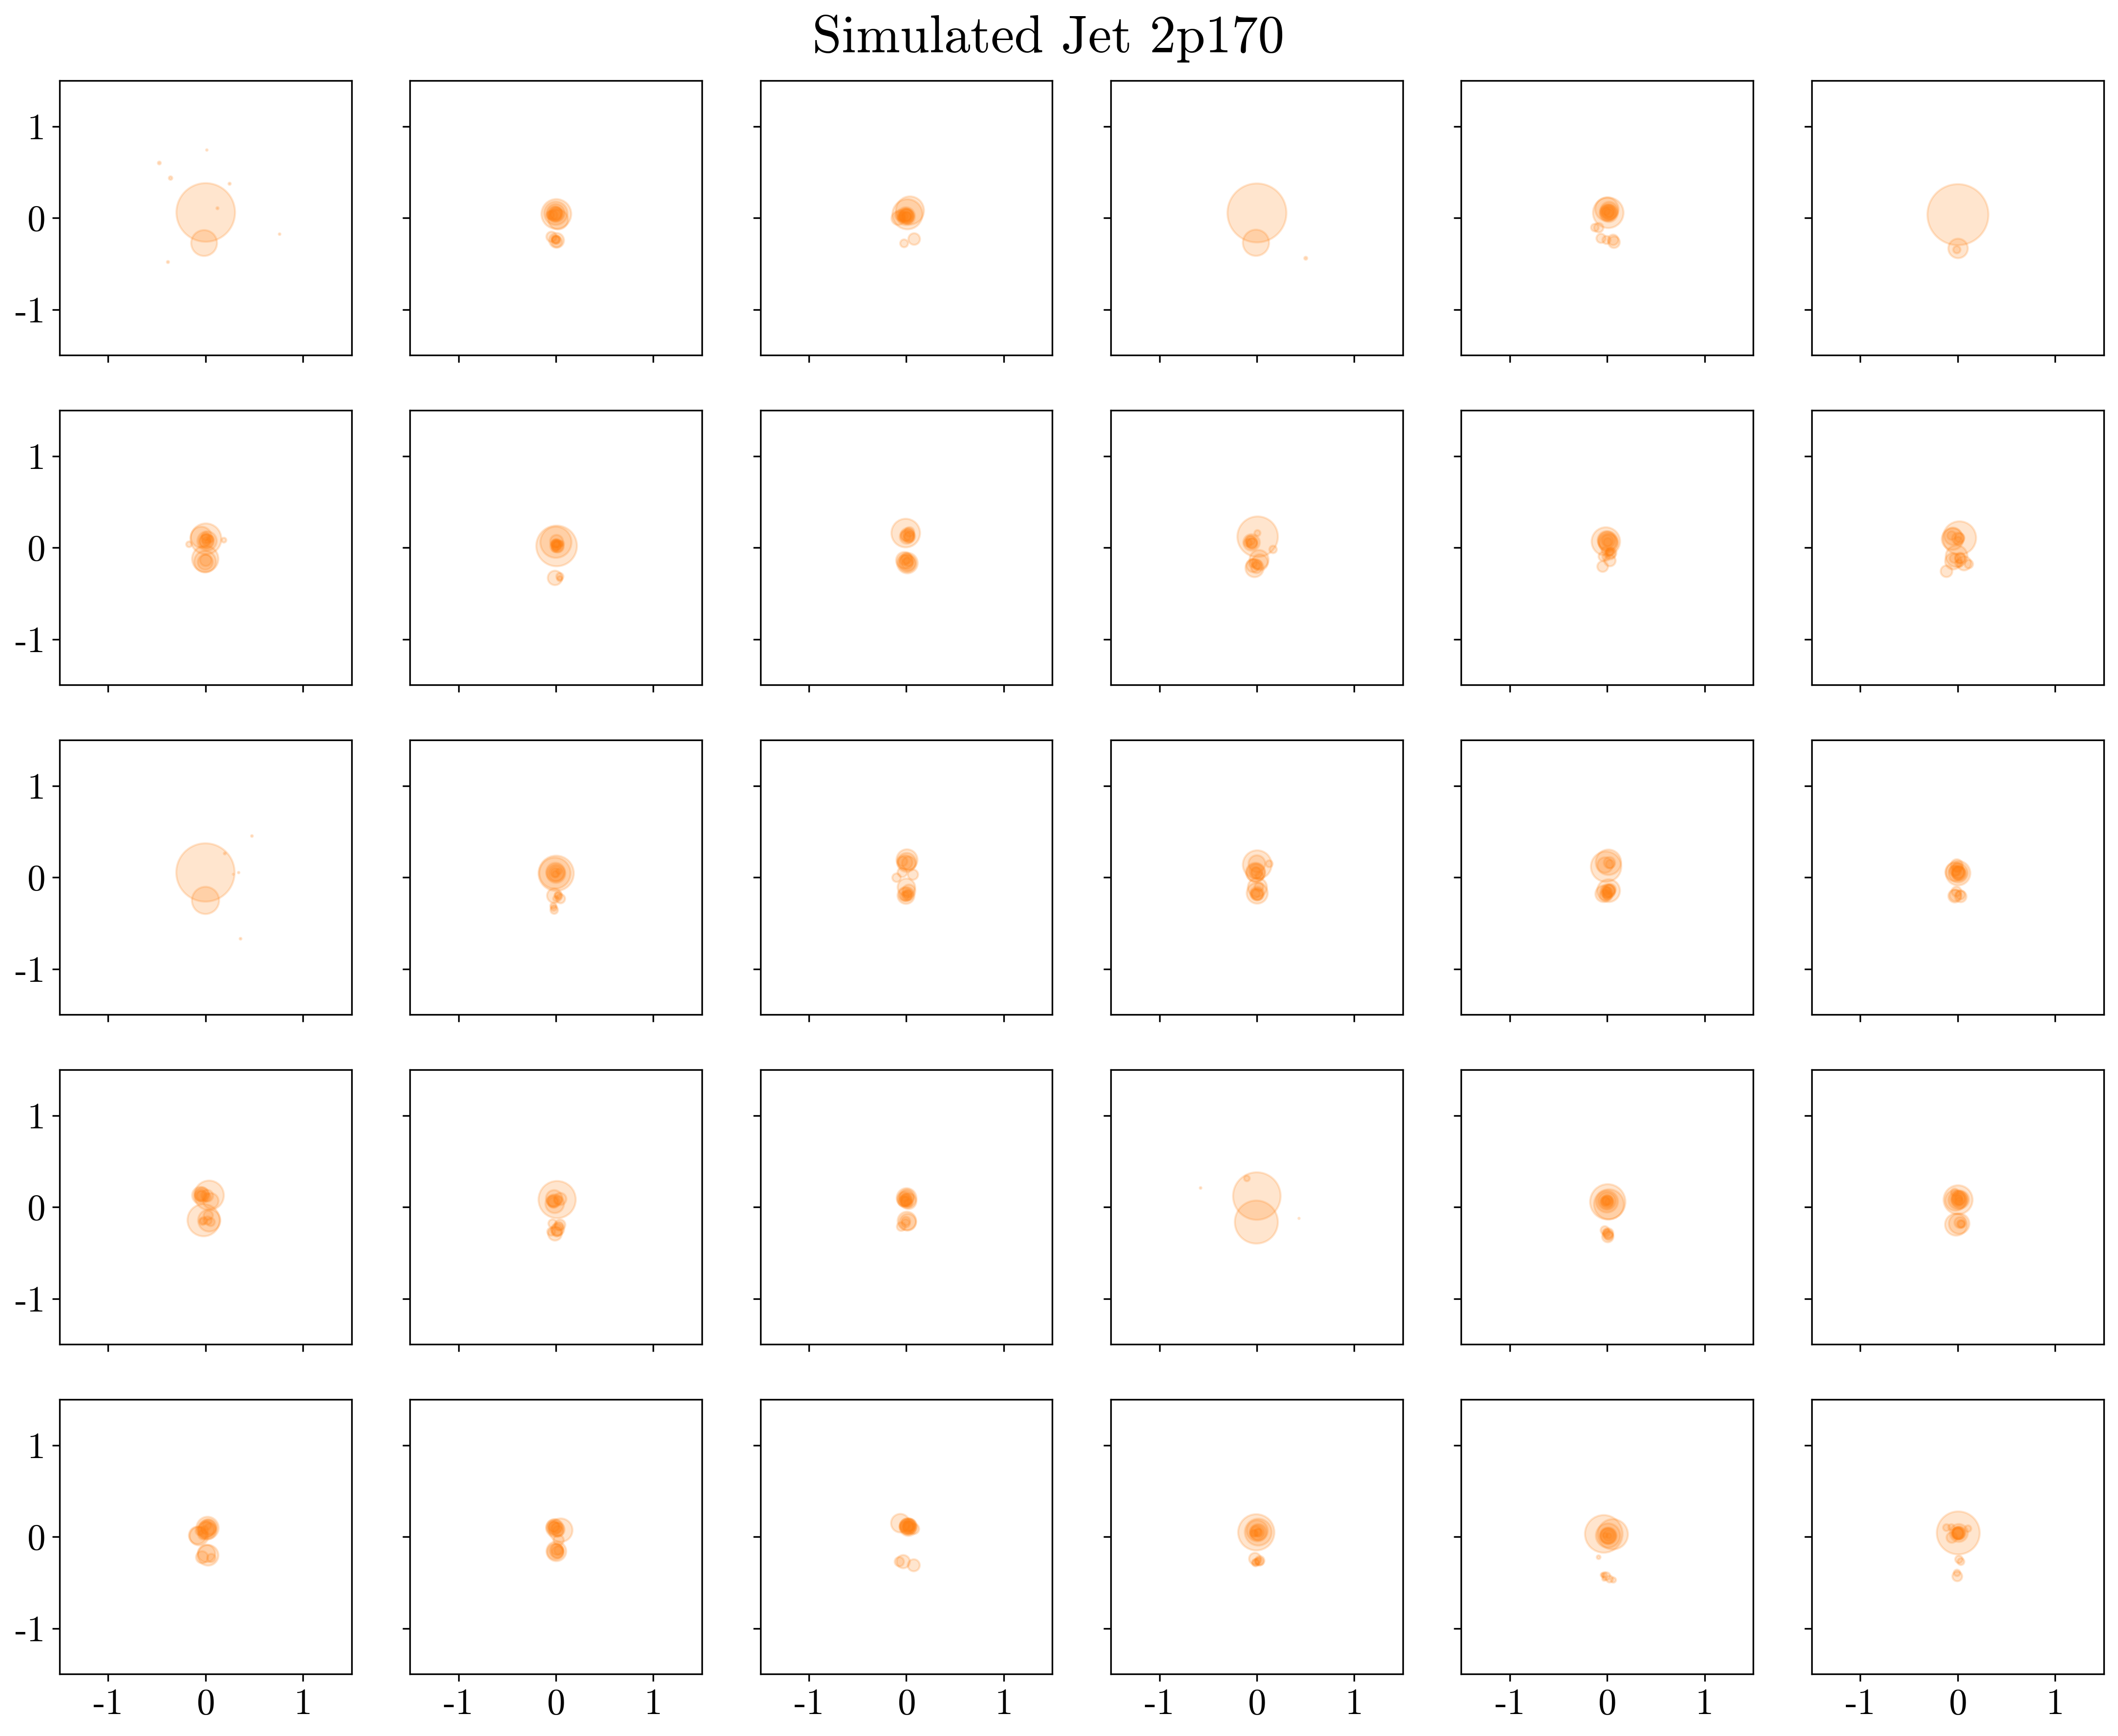

In [18]:
plt.rcParams["figure.figsize"] = (18,15)
plt.rcParams.update({'font.size': 18})
fig, axs = plt.subplots(5, 6, sharex=True, sharey=True)
axs = axs.ravel()
for i in range(30):
    plot_multiple_jets(axs, set_2p[i], i, 'C1')
    
fig = plt.gcf()
st = fig.suptitle("Simulated Jet 2p170", fontsize="x-large")
st.set_y(0.88)
fig.subplots_adjust(top=0.85)


fig.savefig('../figures/paper_JHEP/Examples_SimulatedJet_2p.png')
fig.savefig('../figures/paper_JHEP/Examples_SimulatedJet_2p.pdf')

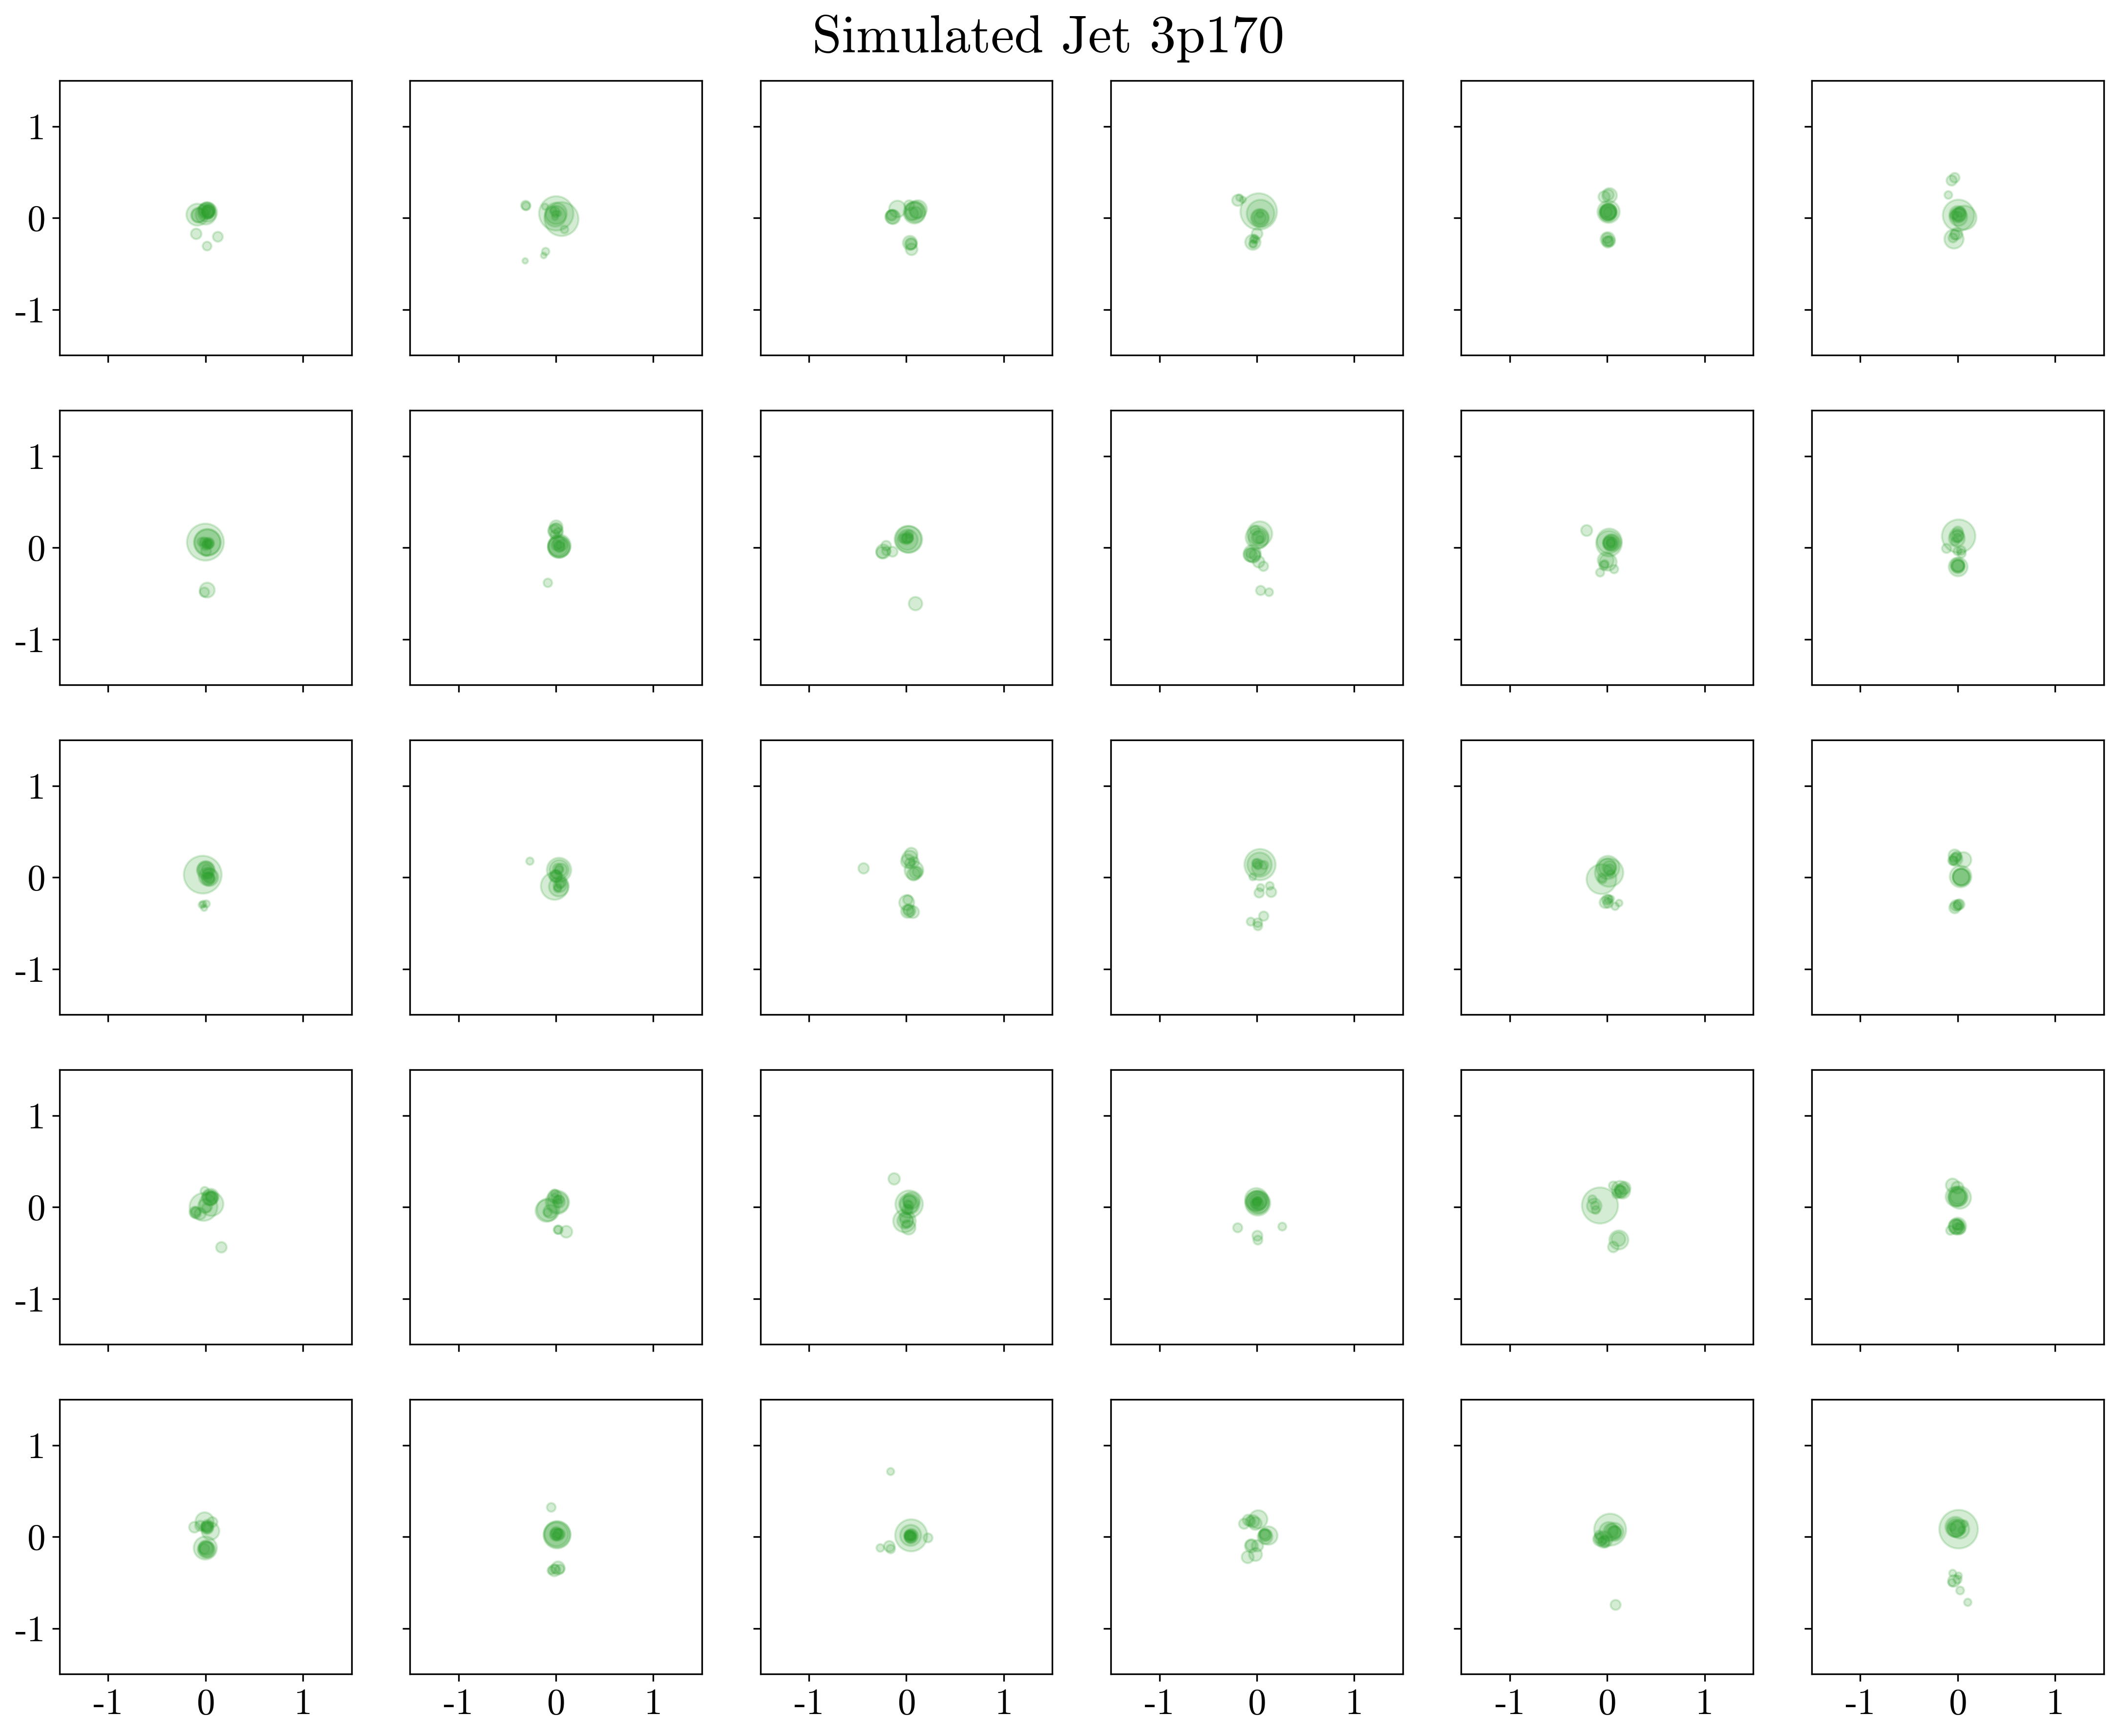

In [20]:
plt.rcParams["figure.figsize"] = (18,15)
plt.rcParams.update({'font.size': 18})
fig, axs = plt.subplots(5, 6, sharex=True, sharey=True)
axs = axs.ravel()
for i in range(30):
    plot_multiple_jets(axs, set_3p[i], i, 'C2')
    
fig = plt.gcf()
st = fig.suptitle("Simulated Jet 3p170", fontsize="x-large")
st.set_y(0.88)
fig.subplots_adjust(top=0.85)


fig.savefig('../figures/paper_JHEP/Examples_SimulatedJet_3p.png')
fig.savefig('../figures/paper_JHEP/Examples_SimulatedJet_3p.pdf')

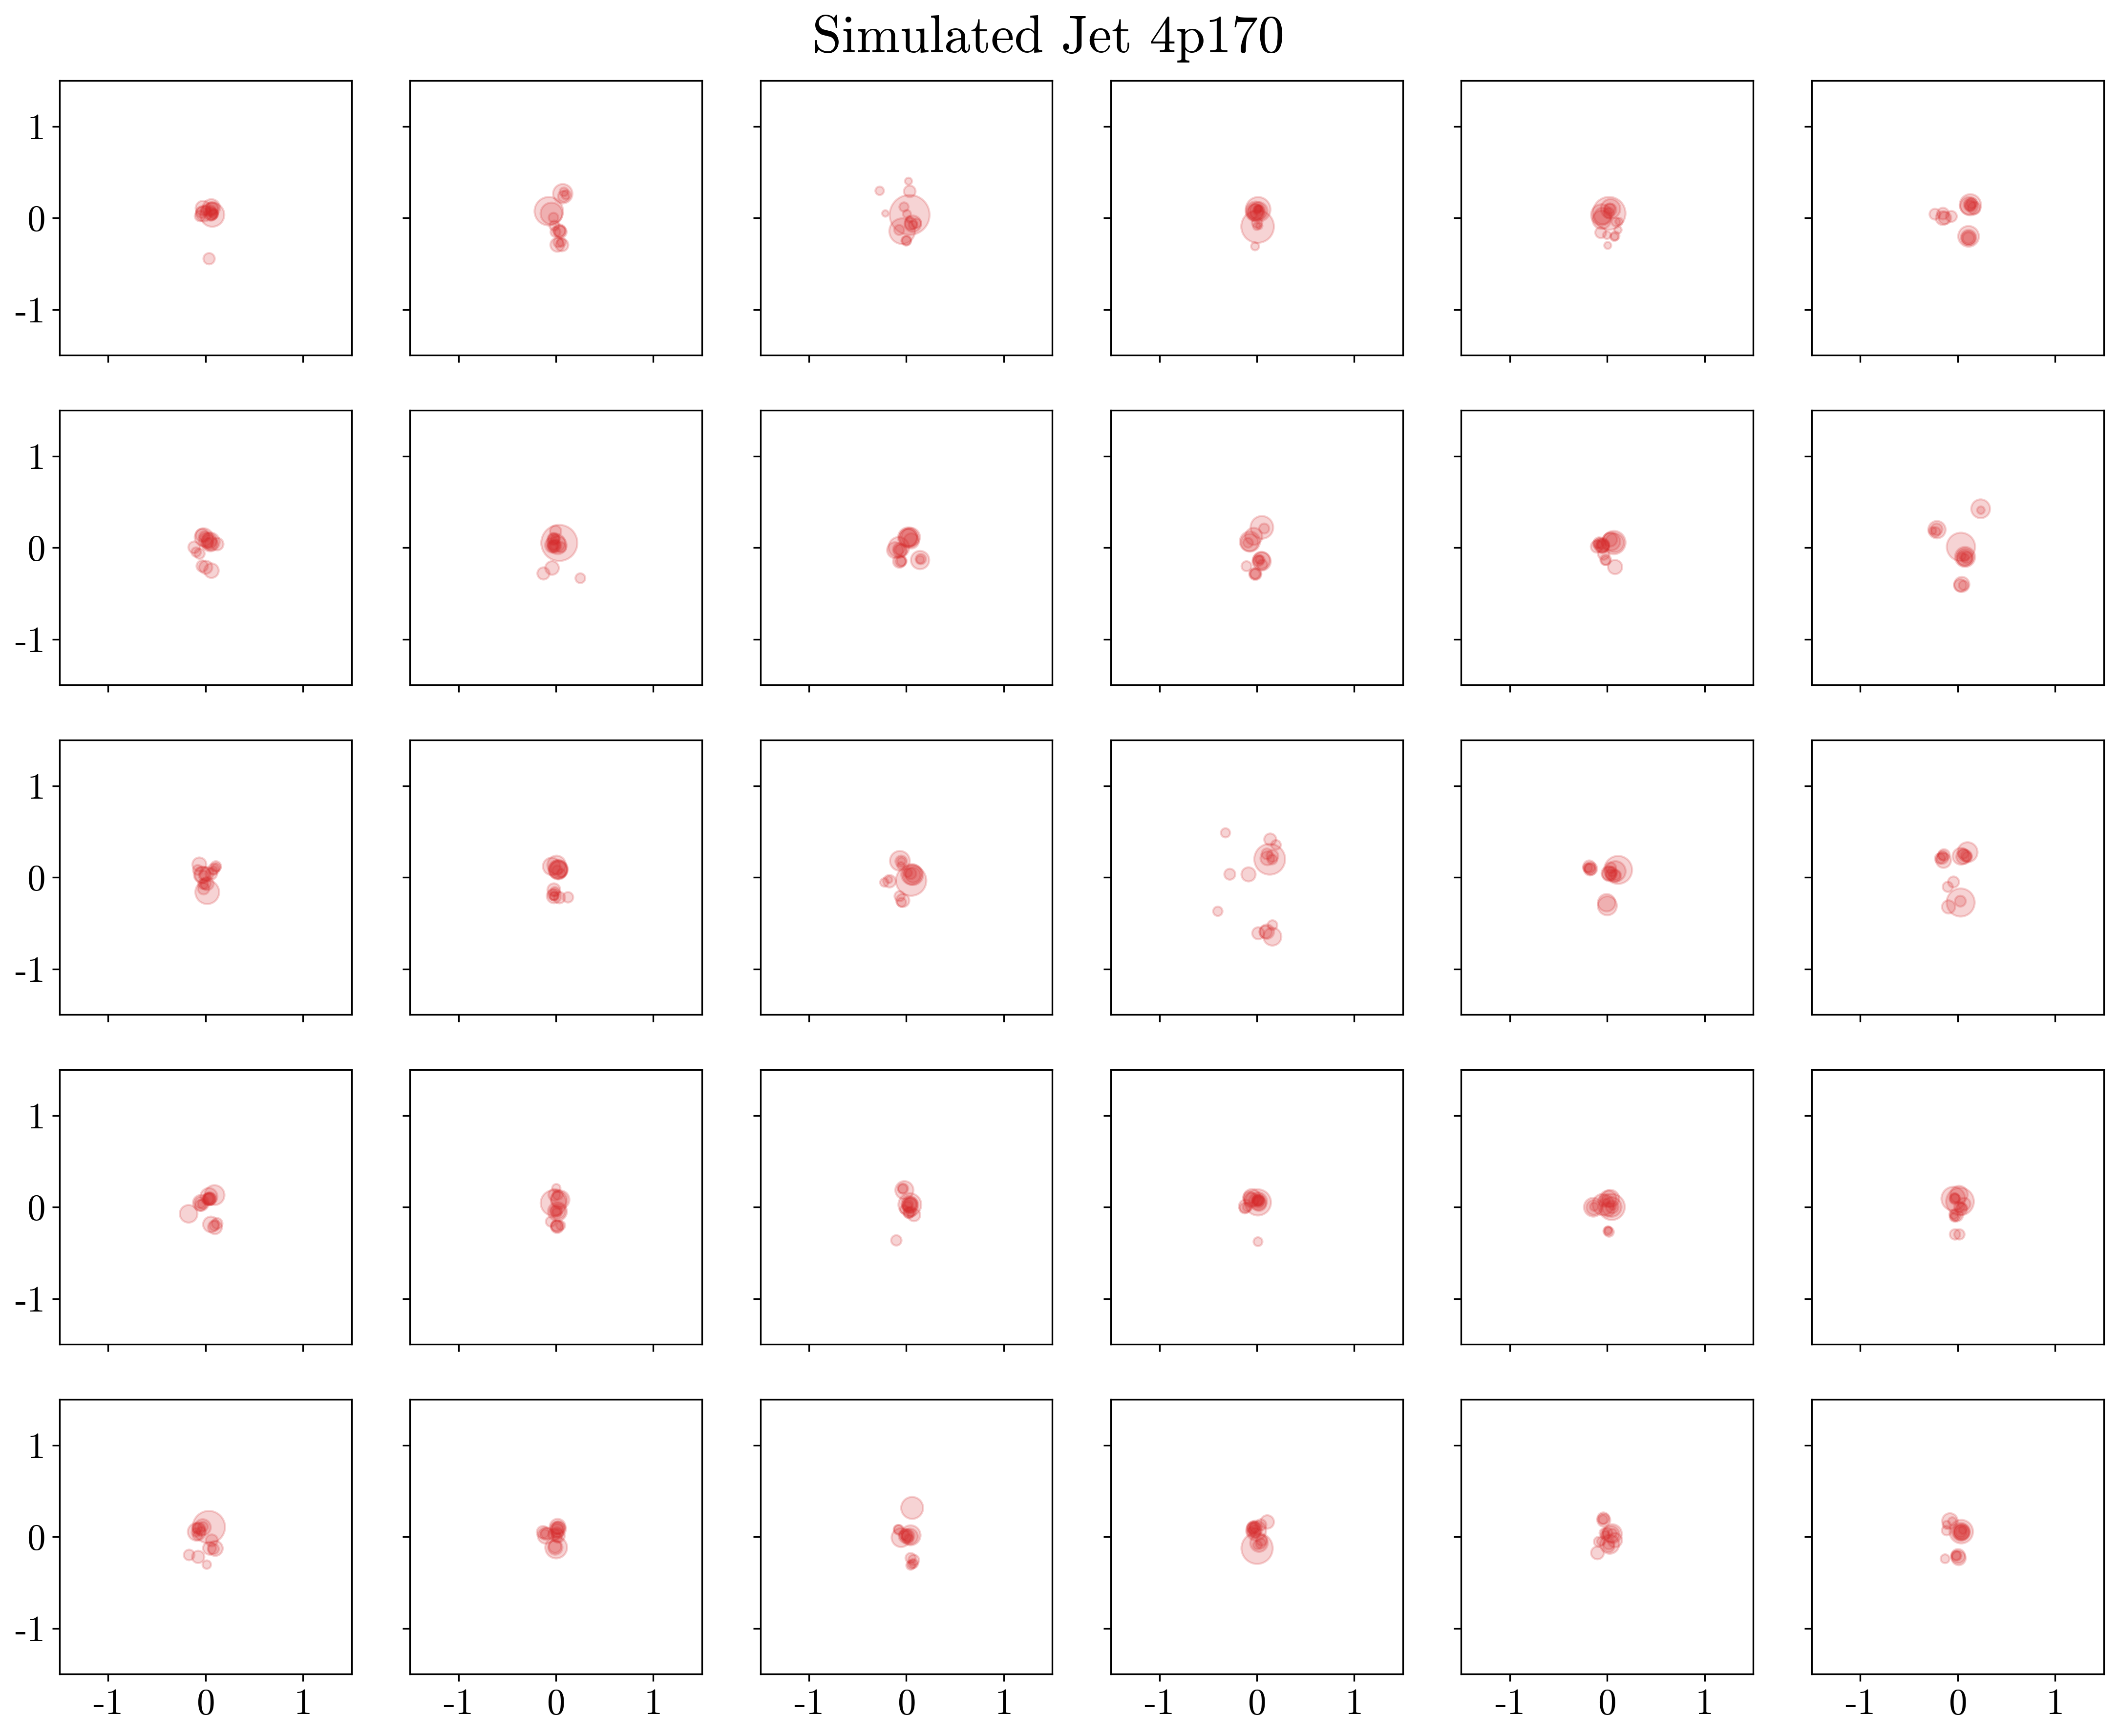

In [21]:
plt.rcParams["figure.figsize"] = (18,15)
plt.rcParams.update({'font.size': 18})
fig, axs = plt.subplots(5, 6, sharex=True, sharey=True)
axs = axs.ravel()
for i in range(30):
    plot_multiple_jets(axs, set_4p[i], i, 'C3')
    
fig = plt.gcf()
st = fig.suptitle("Simulated Jet 4p170", fontsize="x-large")
st.set_y(0.88)
fig.subplots_adjust(top=0.85)


fig.savefig('../figures/paper_JHEP/Examples_SimulatedJet_4p.png')
fig.savefig('../figures/paper_JHEP/Examples_SimulatedJet_4p.pdf')

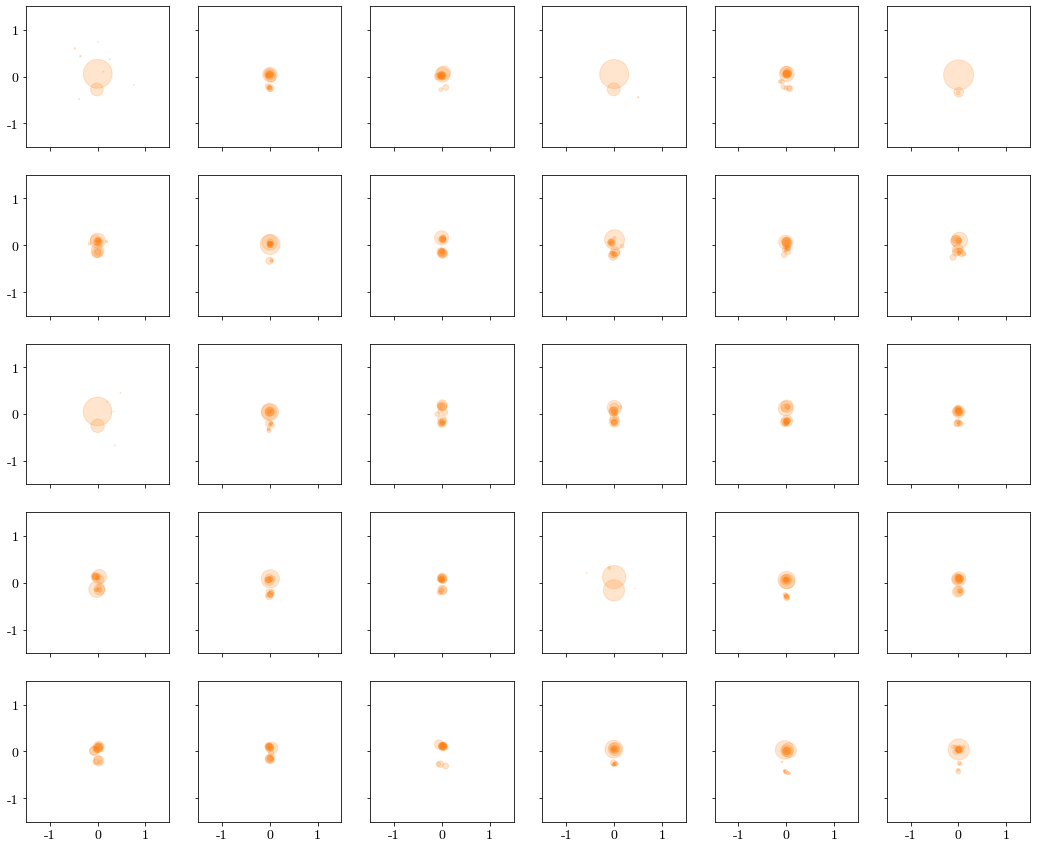

In [34]:
plt.rcParams["figure.figsize"] = (18,15)
plt.rcParams.update({'font.size': 14})
fig, axs = plt.subplots(5, 6, sharex=True, sharey=True)
axs = axs.ravel()
for i in range(30):
    plot_multiple_jets(axs, set_2p[i], i, 'C1')
fig.savefig('../figures/paper/simulated_2p.png')
fig.savefig('../figures/paper/simulated_2p.pdf')

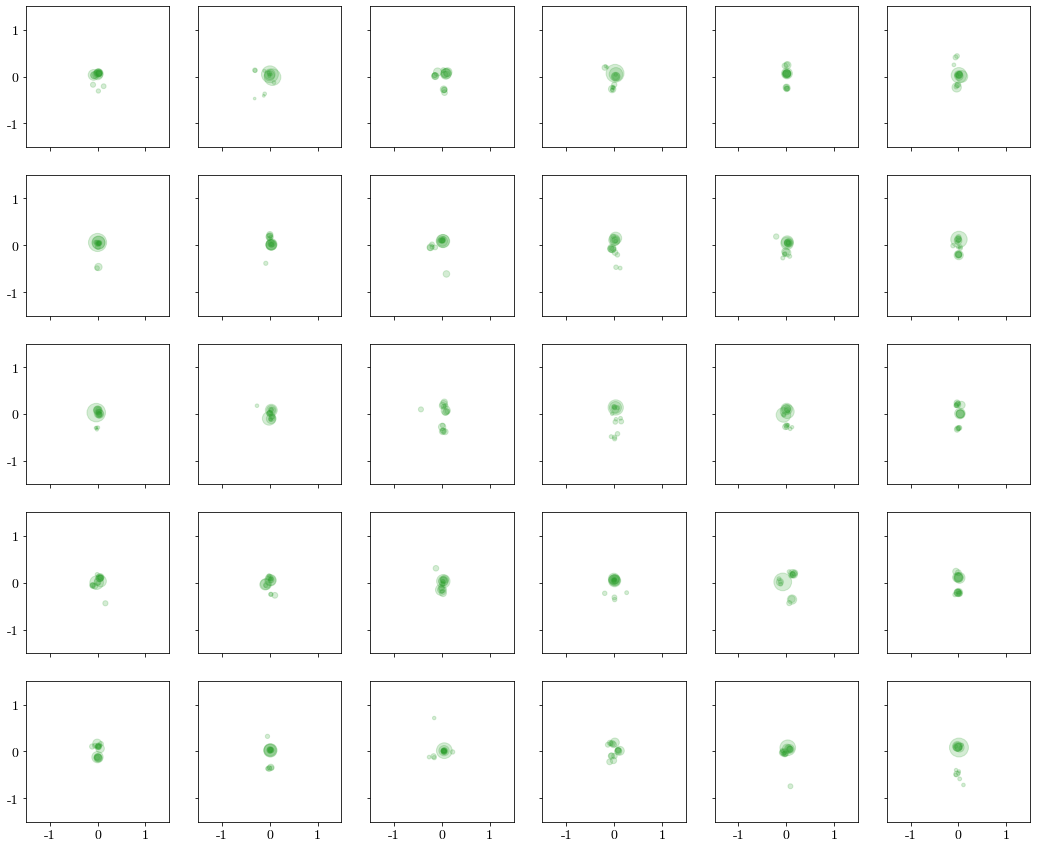

In [36]:
plt.rcParams["figure.figsize"] = (18,15)
plt.rcParams.update({'font.size': 14})
fig, axs = plt.subplots(5, 6, sharex=True, sharey=True)
axs = axs.ravel()
for i in range(30):
    plot_multiple_jets(axs, set_3p[i], i, 'C2')
fig.savefig('../figures/paper/simulated_3p.png')
fig.savefig('../figures/paper/simulated_3p.pdf')

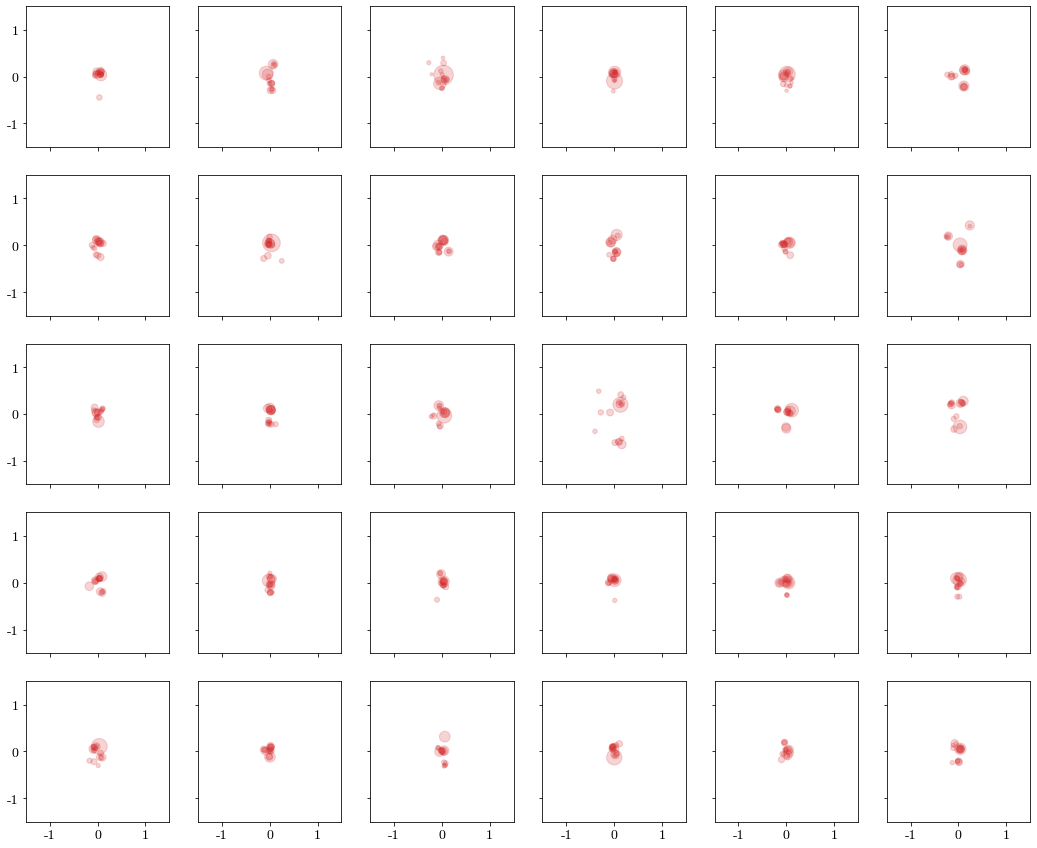

In [37]:
plt.rcParams["figure.figsize"] = (18,15)
plt.rcParams.update({'font.size': 14})
fig, axs = plt.subplots(5, 6, sharex=True, sharey=True)
axs = axs.ravel()
for i in range(30):
    plot_multiple_jets(axs, set_4p[i], i, 'C3')
fig.savefig('../figures/paper/simulated_4p.png')
fig.savefig('../figures/paper/simulated_4p.pdf')

In [35]:
x_1[0].shape

(31, 3)

In [36]:
y_1[4]

array([[ 2.23087266e-01, -2.25170776e-02,  4.78935875e-02],
       [ 1.72632813e-01,  2.64735837e-02,  7.90024400e-02],
       [ 9.54672098e-02,  2.80775726e-02,  7.80311823e-02],
       [ 9.47991312e-02,  2.93683242e-02,  7.56221414e-02],
       [ 6.56326339e-02,  1.48055237e-02, -2.17543110e-01],
       [ 5.40670864e-02, -4.44834679e-03,  4.21866365e-02],
       [ 5.36012910e-02, -8.40954855e-02, -8.89936835e-03],
       [ 3.95657085e-02,  4.48236726e-02, -2.76569515e-01],
       [ 2.34085396e-02,  5.64544909e-02,  4.85502295e-02],
       [ 1.91248972e-02,  3.47377062e-02, -1.77639663e-01],
       [ 1.89472456e-02, -4.72899191e-02, -2.30004966e-01],
       [ 1.89444907e-02, -5.37681095e-02, -4.90752012e-02],
       [ 1.69728249e-02,  2.74382122e-02, -1.92576900e-01],
       [ 1.66434702e-02,  2.42615100e-02,  2.91207545e-02],
       [ 1.50309391e-02,  8.46743025e-03, -6.40769899e-02],
       [ 1.34245222e-02,  1.00410980e-04, -6.45885989e-03],
       [ 9.93673876e-03, -6.79522939e-03

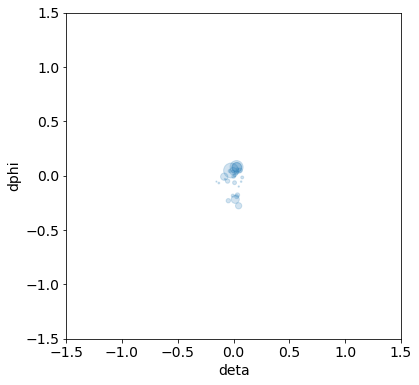

In [37]:
plot_jet(y_1[4])

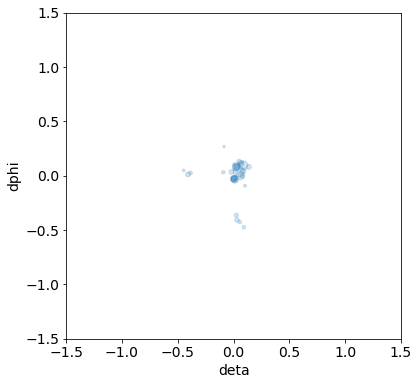

In [38]:
plot_jet(x_1[8])

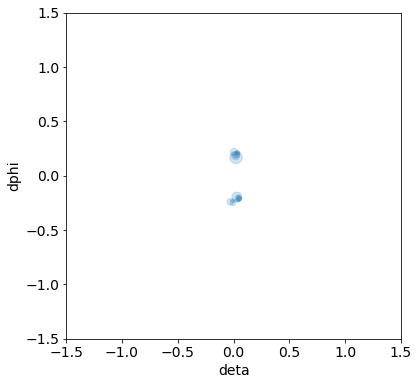

In [122]:
plot_jet(x_1[6])

In [129]:
sys.path.insert(0,'../optimal_transport')
from emdloss import *


In [37]:
df_1 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_2p2p_4000_500_150_16part_jet1.h5")
df_2 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_3p3p_6000_700_700_16part_jet1.h5")

dt_1 = df_1.values
dt_2 = df_2.values

In [43]:
def process_jet_data(temp):
    pt = temp[:,48]
    eta = temp[:,49]
    phi = temp[:,50]
    print(phi[:10])
    #temp[:,:48].reshape(-1, 16, 3)[:,:,0] /= pt.reshape(-1,1)
    temp[:,:48].reshape(-1, 16, 3)[:,:,0] /= np.sum(temp[:,:48].reshape(-1, 16, 3)[:,:,0], axis=1).reshape(-1, 1)
    
    temp[:,:48].reshape(-1, 16, 3)[:,:,1] -= eta.reshape(-1,1)
    #print(temp[:,:48].reshape(-1, 16, 3)[:10,0,2])
    temp[:,:48].reshape(-1, 16, 3)[:,:,2] = fix_phi_vec(temp[:,:48].reshape(-1, 16, 3)[:,:,2] - phi.reshape(-1,1) )
    #print(temp[:,:48].reshape(-1, 16, 3)[:10,0,2])

    return None


In [39]:
process_jet_data(dt_1)

[-0.28288255 -1.88601718 -3.0325504   1.88479179 -1.3634441   0.11449027
  2.11377374 -2.73808232 -1.37712454 -2.73482919]


In [40]:
np.sum(dt_1[:,:48].reshape(-1,16,3)[:,:,0],axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [42]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

In [11]:
def plot_jet(pfcands):

    pt = pfcands[:,0]
    eta = pfcands[:,1]
    phi = pfcands[:,2]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(eta,phi,s=pt*1000, alpha=0.2)
    ax.set_xlabel('deta')
    ax.set_ylabel('dphi')
    ax.set_xlim([-1.5,1.5])
    ax.set_ylim([-1.5,1.5])
    #fig.savefig(f'{path}/{name}.png')

In [12]:
dt_1[0,:48].reshape(-1,3)[:, 0]

array([0.19485613, 0.16618666, 0.12557794, 0.08462045, 0.05815355,
       0.03981882, 0.03867688, 0.03743095, 0.03553191, 0.03488517,
       0.03486259, 0.02078175, 0.02061202, 0.01276068, 0.01222775,
       0.01019689])

In [14]:
%load_ext autoreload
%autoreload 2

In [48]:
def process_jet_data_all(temp):
    pt = temp[:,48]
    eta = temp[:,49]
    phi = temp[:,50]
    #print(phi[:10])
    temp[:,:48].reshape(-1, 16, 3)[:,:,0] /= pt.reshape(-1,1)
    #temp[:,:48].reshape(-1, 16, 3)[:,:,0] /= np.sum(temp[:,:48].reshape(-1, 16, 3)[:,:,0])
    
    temp[:,:48].reshape(-1, 16, 3)[:,:,1] -= eta.reshape(-1,1)
    #print(temp[:,:48].reshape(-1, 16, 3)[:10,0,2])
    temp[:,:48].reshape(-1, 16, 3)[:,:,2] = fix_phi_vec(temp[:,:48].reshape(-1, 16, 3)[:,:,2] - phi.reshape(-1,1) )
    #print(temp[:,:48].reshape(-1, 16, 3)[:10,0,2])
    temp2 = np.apply_along_axis(rotate_eig, 1, temp, 16)

    return temp2

In [49]:
dt_1 = dt_1[dt_1[:,51]>300]

In [50]:
dt_1 = process_jet_data_all(dt_1)

In [224]:
print(dt_1)

NameError: name 'dt_1' is not defined

In [32]:
dt_1[0,:48].reshape(-1,16,3)[:,:,0]

array([[0.19485613, 0.16618666, 0.12557794, 0.08462045, 0.05815355,
        0.03981882, 0.03867688, 0.03743095, 0.03553191, 0.03488517,
        0.03486259, 0.02078175, 0.02061202, 0.01276068, 0.01222775,
        0.01019689]])

In [40]:
dt_1 = dt_1[dt_1[:,51]>300]

In [41]:
dt_1.shape

(38394, 54)

In [45]:
dt_1 = np.apply_along_axis(rotate_eig, 1, dt_1)

TypeError: rotate_eig() missing 1 required positional argument: 'num_part'

In [52]:
df_2p1 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_2p2p_3200_450_450_16part_jet1.h5")
df_2p2 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_2p2p_3200_450_450_16part_jet2.h5")
df_3p1 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_3p3p_3200_450_450_16part_jet1.h5")
df_3p2 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_3p3p_3200_450_450_16part_jet2.h5")
#df_3p1 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_2p2p_4000_500_150_16part_jet1.h5")
#df_3p2 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_2p2p_4000_500_150_16part_jet2.h5")

dt_2p1 = df_2p1.values 
dt_2p2 = df_2p2.values 
dt_3p1 = df_3p1.values 
dt_3p2 = df_3p2.values 

In [40]:
dt_2p1 = dt_2p1[(dt_2p1[:,51]<500) & (dt_2p1[:,51]>400)]
dt_2p2 = dt_2p2[(dt_2p2[:,51]<500) & (dt_2p2[:,51]>400)]
dt_3p1 = dt_3p1[(dt_3p1[:,51]<500) & (dt_3p1[:,51]>400)]
dt_3p2 = dt_3p2[(dt_3p2[:,51]<500) & (dt_3p2[:,51]>400)]

In [41]:
dt_2p1 = dt_2p1[(dt_2p1[:,48]>1000)&(dt_2p1[:,48]<1500)]
dt_2p2 = dt_2p2[(dt_2p2[:,48]>1000)&(dt_2p2[:,48]<1500)]
dt_3p1 = dt_3p1[(dt_3p1[:,48]>1000)&(dt_3p1[:,48]<1500)]
dt_3p2 = dt_3p2[(dt_3p2[:,48]>1000)&(dt_3p2[:,48]<1500)]

In [53]:
process_jet_data(dt_2p1)
process_jet_data(dt_2p2)
process_jet_data(dt_3p1)
process_jet_data(dt_3p2)

[ 0.4595973  -0.46094861  1.99597174  0.8529835   1.59282828 -0.16491634
  2.29659394 -2.74112711 -2.33926141 -2.34103584]
[-2.55309201  2.8592682  -1.14372948 -2.26800474 -1.41292532  3.01758762
 -0.80847314  0.39611139  0.50428644  0.90074528]
[ 2.16706235 -2.91106116  1.88390122  2.86544428  2.60602684 -0.86806851
  2.91490955  1.02455506 -2.48205287  2.49464361]
[-0.96255366 -0.26131752  0.56853341 -0.36653315 -0.70808394  0.83203332
  0.35236496  3.11819995  1.29649022 -0.75633996]


In [44]:
origin = np.zeros([1,2])

In [19]:
#jetcenter = np.average(dt_1[0,:48].reshape(-1,3)[:, 1:3],axis=0, weights = dt_1[0,:48].reshape(-1,3)[:, 0]).reshape(1,2)

In [63]:
#jetcenter

In [23]:
#dt_1[evt_num,:48].reshape(-1,3)[:,1:3].shape

In [45]:
def get_cov_eig(evt):
    cov_mat = np.cov(evt[:48].reshape(-1,3)[:, 1:3], aweights=evt[:48].reshape(-1,3)[:, 0] , rowvar=False)
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    idx = eig_vals.argsort()[::1]   
    eig_vals = eig_vals[idx]
    eig_vecs = eig_vecs[:,idx]
    return eig_vecs

In [46]:
#def rotate_eig(evt, num_part):
#    new = np.copy(evt)
#    cov_mat = np.cov(evt[:3*num_part].reshape(-1,3)[:, 1:3], aweights=evt[:3*num_part].reshape(-1,3)[:, 0] , rowvar=False)
#    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
#    idx = eig_vals.argsort()[::1]   
#    eig_vals = eig_vals[idx]
#    eig_vecs = eig_vecs[:,idx]
#    new[:3*num_part].reshape(-1,3)[:, 1:3] = np.matmul(evt[:3*num_part].reshape(-1,3)[:, 1:3], eig_vecs)
#    return new

In [47]:
def flip_eta(evt):
    new = np.copy(evt)
    right_quadrant = np.where(evt[:48].reshape(-1,3)[:,1]>0)
    left_quadrant = np.where(evt[:48].reshape(-1,3)[:,1]<=0)
    right_sum = np.sum(evt[:48].reshape(-1,3)[right_quadrant,0])
    left_sum = np.sum(evt[:48].reshape(-1,3)[left_quadrant,0])
    if left_sum > right_sum:
        new[:48].reshape(-1,3)[:,1] *= -1
    return new   

In [48]:
def flip(evt):
    new = np.copy(evt)
    upper_quadrant = np.where(evt[:48].reshape(-1,3)[:,2]>0)
    lower_quadrant = np.where(evt[:48].reshape(-1,3)[:,2]<=0)
    upper_sum = np.sum(evt[:48].reshape(-1,3)[upper_quadrant,0])
    lower_sum = np.sum(evt[:48].reshape(-1,3)[lower_quadrant,0])
    if lower_sum > upper_sum:
        new[:48].reshape(-1,3)[:,2] *= -1
    return new     

In [49]:
def rotate_eig(evt):
    #print(evt.shape)
    new = np.copy(evt)
    cov_mat = np.cov(evt[:48].reshape(-1,3)[:, 1:3], aweights=evt[:48].reshape(-1,3)[:, 0] , rowvar=False)
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    idx = eig_vals.argsort()[::1]   
    eig_vals = eig_vals[idx]
    eig_vecs = eig_vecs[:,idx]
    #print(evt[:48].reshape(-1,3)[0, 1:3])
    #print(eig_vecs)
    #principal = eig_vecs[:,0]
    #R = np.array([principal,[-principal[1], principal[0]]])
    #print(R.T)
    #print(eig_vecs)
    new[:48].reshape(-1,3)[:, 1:3] = np.matmul(evt[:48].reshape(-1,3)[:, 1:3], eig_vecs)
    #print(new[:48].reshape(-1,3)[0, 1:3])
    return new
    

In [50]:
def get_cov_eig_val(evt):
    cov_mat = np.cov(evt[:48].reshape(-1,3)[:, 1:3], aweights=evt[:48].reshape(-1,3)[:, 0] , rowvar=False)
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    idx = eig_vals.argsort()[::1]   
    eig_vals = eig_vals[idx]
    eig_vecs = eig_vecs[:,idx]
    return eig_vecs, eig_vals

In [303]:
vec, vals = get_cov_eig_val(dt_2p1[0])

In [304]:
vec

array([[ 0.29236117,  0.95630798],
       [ 0.95630798, -0.29236117]])

In [305]:
vals

array([0.00076925, 0.13883084])

In [306]:
principal = vec[:,0]

In [307]:
vec[:,0]

array([0.29236117, 0.95630798])

148.55070608392964


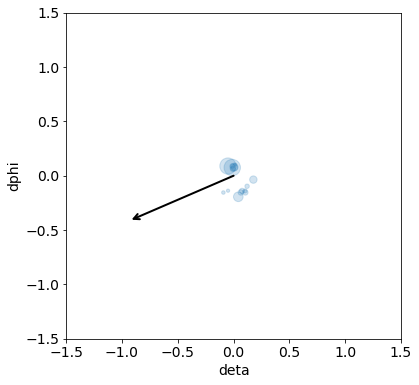

In [54]:
evt_num = 0
print(dt_2p1[evt_num,51])
plot_jet(dt_2p1[evt_num,:48].reshape(-1,3))
draw_vector(*origin, *origin+get_cov_eig(dt_2p1[evt_num])[:,0])
#draw_vector(*origin, *origin+eig_vecs[1])

In [73]:
upper_quadrant = np.where(rotate_eig(dt_2p1[evt_num])[:48].reshape(-1,3)[:,2]>0)

In [81]:
lower_quadrant = np.where(rotate_eig(dt_2p1[evt_num])[:48].reshape(-1,3)[:,2]<=0)

In [75]:
rotate_eig(dt_2p1[evt_num])[:48].reshape(-1,3)

array([[ 0.14334855,  0.00718523, -0.24910127],
       [ 0.13890703, -0.01821699, -0.25430277],
       [ 0.11179387, -0.00930238,  0.44678279],
       [ 0.08853042, -0.01524445,  0.44366664],
       [ 0.08697143, -0.00899253,  0.44900853],
       [ 0.06692088,  0.00248706,  0.45633446],
       [ 0.06028215, -0.06017454, -0.37932609],
       [ 0.05279172, -0.00756452,  0.42555702],
       [ 0.04170526,  0.03420526, -0.22448837],
       [ 0.03482049,  0.01875326, -0.28165134],
       [ 0.03284388, -0.0643558 , -0.34697362],
       [ 0.03088703,  0.05661371, -0.22553887],
       [ 0.02833604, -0.00145662,  0.44610445],
       [ 0.02821359, -0.01733575, -0.25699607],
       [ 0.02695093,  0.06592583, -0.25330696],
       [ 0.02669673, -0.00265041, -0.24528266]])

In [82]:
rotate_eig(dt_2p1[evt_num])[:48].reshape(-1,3)[lower_quadrant]

array([[ 0.14334855,  0.00718523, -0.24910127],
       [ 0.13890703, -0.01821699, -0.25430277],
       [ 0.06028215, -0.06017454, -0.37932609],
       [ 0.04170526,  0.03420526, -0.22448837],
       [ 0.03482049,  0.01875326, -0.28165134],
       [ 0.03284388, -0.0643558 , -0.34697362],
       [ 0.03088703,  0.05661371, -0.22553887],
       [ 0.02821359, -0.01733575, -0.25699607],
       [ 0.02695093,  0.06592583, -0.25330696],
       [ 0.02669673, -0.00265041, -0.24528266]])

In [79]:
rotate_eig(dt_2p1[evt_num])[:48].reshape(-1,3)[upper_quadrant]

array([[ 0.11179387, -0.00930238,  0.44678279],
       [ 0.08853042, -0.01524445,  0.44366664],
       [ 0.08697143, -0.00899253,  0.44900853],
       [ 0.06692088,  0.00248706,  0.45633446],
       [ 0.05279172, -0.00756452,  0.42555702],
       [ 0.02833604, -0.00145662,  0.44610445]])

In [83]:
np.sum(rotate_eig(dt_2p1[evt_num])[:48].reshape(-1,3)[lower_quadrant,0])

0.564655644277925

In [76]:
np.sum(rotate_eig(dt_2p1[evt_num])[:48].reshape(-1,3)[upper_quadrant,0])

0.43534435572207497

In [ ]:
dt_2p1

443.8363206887978


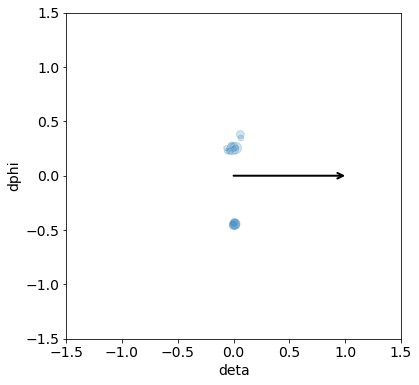

In [60]:
evt_num = 1
print(flip_eta(flip(rotate_eig(dt_2p1[evt_num])))[51])
plot_jet(flip_eta(flip(rotate_eig(dt_2p1[evt_num])))[:48].reshape(-1,3))
draw_vector(*origin, *origin+get_cov_eig(rotate_eig(dt_2p1[evt_num]))[:,0])

443.8363206887978


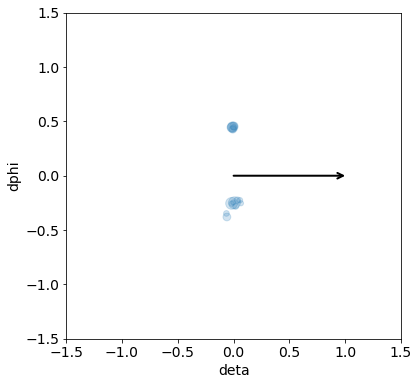

In [59]:
evt_num = 1
print(rotate_eig(dt_2p1[evt_num])[51])
plot_jet(rotate_eig(dt_2p1[evt_num])[:48].reshape(-1,3))
draw_vector(*origin, *origin+get_cov_eig(rotate_eig(dt_2p1[evt_num]))[:,0])

In [56]:
dt_1.shape

(38394, 54)

In [15]:
evt_num = 0
print(dt_new[evt_num,51])
plot_jet(dt_new[evt_num,:48].reshape(-1,3))
draw_vector(*origin, *origin+get_cov_eig(dt_new[evt_num])[:,0])
#draw_vector(*origin, *origin+eig_vecs[1])

NameError: name 'dt_new' is not defined

463.4783748690022


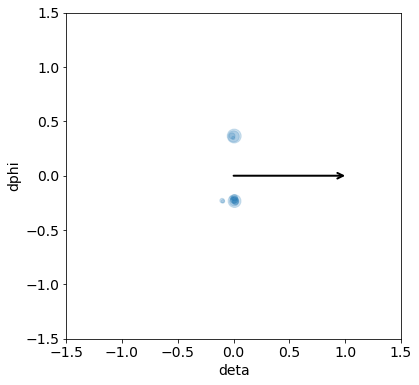

In [55]:
evt_num = 0
print(rotate_eig(dt_1[evt_num],16)[51])
plot_jet(rotate_eig(dt_1[evt_num],16)[:48].reshape(-1,3))
draw_vector(*origin, *origin+get_cov_eig(rotate_eig(dt_1[evt_num],16))[:,0])

In [39]:
dt_1[0,:48].reshape(-1,16,3)[:,:,0]

array([[302.62124634, 258.09613037, 195.02877808, 131.41976929,
         90.31535339,  61.84059906,  60.06711578,  58.13211823,
         55.18281555,  54.17840195,  54.14332962,  32.27509689,
         32.01148987,  19.81797028,  18.99031067,  15.83627605]])

492.0693594080945


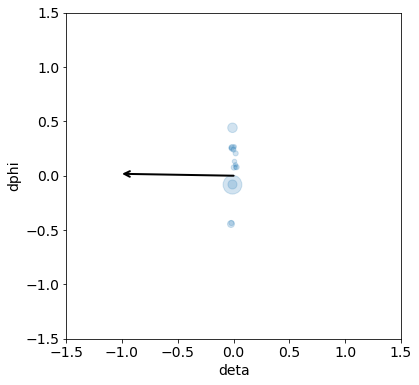

In [35]:
evt_num = 1
print(dt_1[evt_num,51])
plot_jet(dt_1[evt_num,:48].reshape(-1,3))
draw_vector(*origin, *origin+get_cov_eig(dt_1[evt_num])[:,0])
#draw_vector(*origin, *origin+eig_vecs[1])

In [71]:
df_1

array([[-8.91141684e-17, -3.12611699e-01,  1.61613654e-01, ...,
         4.63478375e+02,  4.63478375e+02,  4.63478375e+02],
       [-2.27221657e-13, -2.29981041e+00, -1.86375129e+00, ...,
         3.15212864e+01,  1.86438051e+00,  2.83297651e+01],
       [-5.54384260e-17, -2.06572160e-01, -3.00543523e+00, ...,
         1.49228912e+02,  1.47338504e+02,  1.47338504e+02],
       ...,
       [-2.30975160e-16, -1.57039583e+00, -6.82635963e-01, ...,
         5.09771456e+02,  5.09771456e+02,  5.09771456e+02],
       [-3.43026951e-17,  2.09981278e-01, -9.11282748e-02, ...,
         5.37158794e+02,  5.37158794e+02,  5.37158794e+02],
       [-3.10231284e-17,  2.64288694e-01,  2.96257067e+00, ...,
         5.05028544e+02,  5.05028544e+02,  5.05028544e+02]])

In [18]:
from sklearn.decomposition import PCA

In [1]:
new = emd_preprocess(evt1)

NameError: name 'emd_preprocess' is not defined

In [ ]:
new.shape

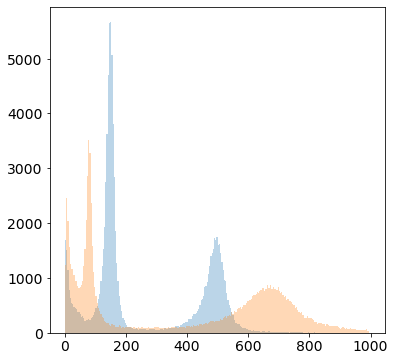

In [18]:
#plt.hist(dt_1[:,51], bins=np.arange(0,600,1));
plt.hist(dt_1[:,52], bins=np.arange(0,1000,4),alpha=0.3);
plt.hist(dt_2[:,52], bins=np.arange(0,1000,4),alpha=0.3);

#plt.hist(dt_1[:,53], bins=np.arange(0,600,1));

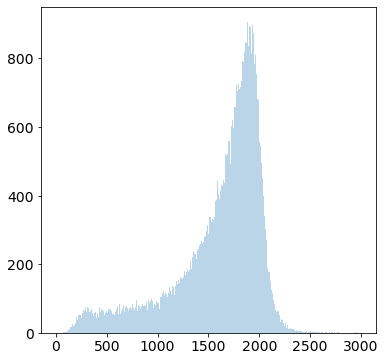

In [20]:
plt.hist(dt_1[:,48], bins=np.arange(0,3000,5), alpha=0.3);
#plt.hist(dt_2[:,48], bins=np.arange(0,3000,5), alpha=0.3);


In [52]:
evt1 = dt_1[0,:3*NPART].reshape(-1,3)

In [53]:
evt1[:,0] /= np.sum(evt1[:,0])

In [54]:
np.sum(evt1[:,0])

1.0

In [55]:
def plot_event(pfcands):

    pt = pfcands[:,0]
    eta = pfcands[:,1]
    phi = pfcands[:,2]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(eta,phi,s=pt*1000, alpha=0.2)
    ax.set_xlabel('eta')
    ax.set_ylabel('phi')
    ax.set_xlim([-4,4])
    ax.set_ylim([-4,4])
    #fig.savefig(f'{path}/{name}.png')

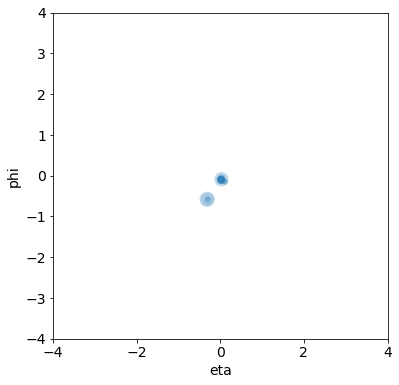

In [56]:
plot_event(evt1.reshape(-1,3))